

FEATURES:<br>

Brand: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

Price: The price of the used car in INR Lakhs.

In [1]:
!pip install xgboost

In [2]:
pip install XlsxWriter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.6 MB/s eta 0:00:00


<B><h3>IMPORTING LIBRARIES</h3></B>

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import re
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from math import sqrt
from sklearn import neighbors
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

<h2><I> TRAIN DATA</I></H2><BR>

In [4]:
# Read target variable data
train_y = pd.read_csv('/content/training_data_targets.csv')

# Rename the first column to 'Selling_Price'
train_y = train_y.rename(columns={train_y.columns[0]: 'Selling_Price'})

# Display the first few rows of the modified target variable data
print(train_y.head())


   Selling_Price
0           3.20
1          21.50
2           4.75
3           2.90
4           3.87


In [5]:
# Read DataFrames
train_x = pd.read_csv('/content/training_data.csv')
train_y = pd.read_csv('/content/training_data_targets.csv')

# Concatenate DataFrames along columns
train_x['Selling_Price'] = train_y['Selling_Price']

# Display the first few rows of the combined DataFrame
print(train_x.head())

#test data

test_x = pd.read_csv(r"/content/test_data.csv")
print(test_x)


                    Brand Location  Year  Kilometers_Driven Fuel_Type  \
0  Maruti Celerio VXI AMT    Delhi  2014              35214    Petrol   
1         Audi Q5 2.0 TDI    Delhi  2013              71000    Diesel   
2        Toyota Etios VXD     Pune  2012             111000    Diesel   
3  Maruti Wagon R LXI CNG     Pune  2012              90400       CNG   
4  Maruti Wagon R AMT VXI   Jaipur  2016              68630    Petrol   

  Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0    Automatic     Second   23.1 kmpl   998 CC  67.04 bhp    5.0   
1    Automatic      First  14.16 kmpl  1968 CC  174.3 bhp    5.0   
2       Manual      First  23.59 kmpl  1364 CC   67.1 bhp    5.0   
3       Manual      First  26.2 km/kg   998 CC   58.2 bhp    5.0   
4    Automatic      First  20.51 kmpl   998 CC     67 bhp    5.0   

   Selling_Price  
0           3.20  
1          21.50  
2           4.75  
3           2.90  
4           3.87  
                                      

<br><h2>DATA COLLECTION:</h2></br>


In [6]:
train_x.describe

<bound method NDFrame.describe of                                              Brand   Location  Year  \
0                           Maruti Celerio VXI AMT      Delhi  2014   
1                                  Audi Q5 2.0 TDI      Delhi  2013   
2                                 Toyota Etios VXD       Pune  2012   
3                           Maruti Wagon R LXI CNG       Pune  2012   
4                           Maruti Wagon R AMT VXI     Jaipur  2016   
...                                            ...        ...   ...   
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 35214    Petrol    Aut

In [7]:
train_x

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0,4.75
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.90
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97 kmpl,1498 CC,99.6 bhp,5.0,6.75
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62 kmpl,2198 CC,158 bhp,7.0,32.90
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.1 kmpl,2179 CC,140 bhp,7.0,9.00
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,4.95


In [8]:
print(train_x.tail())

                                             Brand   Location  Year  \
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
5412              27000    Petrol    Automatic      First  17.97 kmpl   
5413               9000    Diesel    Automatic      First  12.62 kmpl   
5414             140000    Diesel       Manual     Second   15.1 kmpl   
5415              76414    Diesel       Manual      First   25.8 kmpl   
5416              98000    Diesel       Manual     Second   12.8 kmpl   

       Engine     Power  Seats  Selling_Price  
5412  1498 CC  99.6 bhp    5.0           6.75  
5413  2198 CC   158 bhp    7.0        

In [9]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5417 entries, 0 to 5416
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5417 non-null   object 
 1   Location           5417 non-null   object 
 2   Year               5417 non-null   int64  
 3   Kilometers_Driven  5417 non-null   int64  
 4   Fuel_Type          5417 non-null   object 
 5   Transmission       5417 non-null   object 
 6   Owner_Type         5417 non-null   object 
 7   Mileage            5416 non-null   object 
 8   Engine             5383 non-null   object 
 9   Power              5383 non-null   object 
 10  Seats              5379 non-null   float64
 11  Selling_Price      5417 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 508.0+ KB


In [10]:
train_x.describe()

,Year,Kilometers_Driven,Seats,Selling_Price
count,5417.000000,5.417000e+03,5379.000000,5417.000000
mean,2013.363670,5.882682e+04,5.280350,9.453670
std,3.283659,9.511826e+04,0.811459,11.166658
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.329300e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.900000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [11]:
# Converting to Excel for verificatoin
train_x.to_excel('C:\\Users\\Ishanya\\Desktop\\DSML Project\\1\\data\\RAWDATA\\combined_data_altered.xlsx', index=False)


<b><h1>DATA CLEANING</h1></b>

<h2>Removing Null Values:</h2>

In [12]:
train_x.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                38
Selling_Price         0
dtype: int64

In [13]:

# Find and replace specific values with NaN for each column in train_x
replacement_dict = {
    '0.0 kmpl': np.NaN,  # Replace '0.0' with NaN in the 'Mileage' column
    'null bhp': np.NaN,  # Replace 'null' with NaN in the 'Power' column (assuming 'null' is a placeholder for missing values)
    0: np.NaN  # Replace 0 with NaN in other numeric columns, adjust this based on your dataset
}

train_x = train_x.replace(replacement_dict)

# Display the first 50 rows of the modified DataFrame
print(train_x.head(50))


                                              Brand    Location  Year  \
0                            Maruti Celerio VXI AMT       Delhi  2014   
1                                   Audi Q5 2.0 TDI       Delhi  2013   
2                                  Toyota Etios VXD        Pune  2012   
3                            Maruti Wagon R LXI CNG        Pune  2012   
4                            Maruti Wagon R AMT VXI      Jaipur  2016   
5                            Hyundai i20 1.4 Sportz   Ahmedabad  2018   
6                             Hyundai Verna CRDi SX   Hyderabad  2013   
7                     Mahindra Scorpio VLX 2WD BSIV   Hyderabad  2014   
8                                  Maruti Swift ZDi   Hyderabad  2015   
9                      BMW 3 Series 320d Sport Line   Hyderabad  2012   
10                        Honda Amaze VX AT i-Vtech   Hyderabad  2014   
11                             Hyundai i20 Asta 1.2        Pune  2011   
12                    Mahindra Bolero mHAWK D70 ZLX

In [14]:

# Count of 0 values for each feature in train_x
count_of_zerosBrand = (train_x['Brand'] == 0).sum()
count_of_zerosLocation = (train_x['Location'] == 0).sum()
count_of_zerosYear = (train_x['Year'] == 0).sum()
count_of_zerosKilometers_Driven = (train_x['Kilometers_Driven'] == 0).sum()
count_of_zerosFuel_Type = (train_x['Fuel_Type'] == 0).sum()
count_of_zerosTransmission = (train_x['Transmission'] == 0).sum()
count_of_zerosOwner_Type = (train_x['Owner_Type'] == 0).sum()
count_of_zerosMileage = (train_x['Mileage'] == 0).sum()
count_of_zerosEngine = (train_x['Engine'] == 0).sum()
count_of_zerosPower = (train_x['Power'] == 0).sum()
count_of_zerosSeats = (train_x['Seats'] == 0).sum()
count_of_zerosSelling_Price = (train_x['Selling_Price'] == 0).sum()

# Print the counts
print("Count of 0 values in 'Brand' column:", count_of_zerosBrand)
print("Count of 0 values in 'Location' column:", count_of_zerosLocation)
print("Count of 0 values in 'Year' column:", count_of_zerosYear)
print("Count of 0 values in 'Kilometers_Driven' column:", count_of_zerosKilometers_Driven)
print("Count of 0 values in 'Fuel_Type' column:", count_of_zerosFuel_Type)
print("Count of 0 values in 'Transmission' column:", count_of_zerosTransmission)
print("Count of 0 values in 'Owner_Type' column:", count_of_zerosOwner_Type)
print("Count of 0 values in 'Mileage' column:", count_of_zerosMileage)
print("Count of 0 values in 'Engine' column:", count_of_zerosEngine)
print("Count of 0 values in 'Power' column:", count_of_zerosPower)
print("Count of 0 values in 'Seats' column:", count_of_zerosSeats)
print("Count of 0 values in 'Selling_Price' column:", count_of_zerosSelling_Price)

Count of 0 values in 'Brand' column: 0
Count of 0 values in 'Location' column: 0
Count of 0 values in 'Year' column: 0
Count of 0 values in 'Kilometers_Driven' column: 0
Count of 0 values in 'Fuel_Type' column: 0
Count of 0 values in 'Transmission' column: 0
Count of 0 values in 'Owner_Type' column: 0
Count of 0 values in 'Mileage' column: 0
Count of 0 values in 'Engine' column: 0
Count of 0 values in 'Power' column: 0
Count of 0 values in 'Seats' column: 0
Count of 0 values in 'Selling_Price' column: 0


In [15]:
train_x.isnull().sum()

Brand                  0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               57
Engine                34
Power                129
Seats                 39
Selling_Price          0
dtype: int64

In [16]:
#function for imputing missing values with mode
def impute_with_mode(data, column):
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)
    print(f"Mode of {column}: {mode_value}")

    # Check if there are any missing values left in the column after imputation
    missing_values = data[column].isnull().sum()
    print(f"Missing values in {column} column after imputation: {missing_values}")

# Columns to impute
columns_to_impute = ['Mileage', 'Engine', 'Power', 'Seats']

# Impute missing values for each specified column
for column in columns_to_impute:
    impute_with_mode(train_x, column)

# Display the first 50 rows of the modified DataFrame
#print(train_x.head(50))


Mode of Mileage: 17.0 kmpl
Missing values in Mileage column after imputation: 0
Mode of Engine: 1197 CC
Missing values in Engine column after imputation: 0
Mode of Power: 74 bhp
Missing values in Power column after imputation: 0
Mode of Seats: 5.0
Missing values in Seats column after imputation: 0


In [17]:
# Removing units from Mileage, Engine, and Power columns in the 'train_x' DataFrame
train_x['Mileage'] = train_x['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
train_x['Mileage'] = train_x['Mileage'].apply(lambda x: str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))

train_x['Engine'] = train_x['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))

train_x['Power'] = train_x['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))


In [18]:
train_x.isnull().sum()

Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Selling_Price        0
dtype: int64

In [19]:
# Check unique values in the 'Mileage' column
unique_mileage_values = train_x['Mileage'].unique()
print("Unique values in 'Mileage':", unique_mileage_values)

# Check unique values in the 'Engine' column
unique_engine_values = train_x['Engine'].unique()
print("Unique values in 'Engine':", unique_engine_values)

# Check unique values in the 'Power' column
unique_power_values = train_x['Power'].unique()
print("Unique values in 'Power':", unique_power_values)

# Check unique values in the 'Seats' column
unique_seats_values = train_x['Seats'].unique()
print("Unique values in 'Seats':", unique_seats_values)


Unique values in 'Mileage': ['23.1 ' '14.16 ' '23.59 ' '26.2 ' '20.51 ' '22.54 ' '16.8 ' '12.05 '
 '25.2 ' '18.88 ' '15.5 ' '18.5 ' '16.5 ' '14.0 ' '18.3 ' '14.84 ' '17.0 '
 '21.1 ' '17.9 ' '19.3 ' '25.1 ' '17.05 ' '16.95 ' '13.5 ' '17.4 ' '17.7 '
 '11.36 ' '12.8 ' '12.4 ' '18.6 ' '24.4 ' '17.57 ' '17.6 ' '16.36 '
 '18.49 ' '14.07 ' '17.2 ' '17.54 ' '21.76 ' '15.04 ' '24.07 ' '22.95 '
 '13.17 ' '16.0 ' '13.0 ' '20.36 ' '21.7 ' '18.9 ' '17.8 ' '19.0 ' '13.6 '
 '15.1 ' '19.4 ' '25.8 ' '14.28 ' '20.77 ' '15.41 ' '16.46 ' '19.7 '
 '23.9 ' '22.9 ' '24.3 ' '22.32 ' '21.9 ' '17.5 ' '22.3 ' '18.1 ' '25.4 '
 '16.47 ' '20.54 ' '17.11 ' '19.83 ' '16.55 ' '16.1 ' '23.08 ' '12.65 '
 '19.01 ' '21.5 ' '23.0 ' '16.25 ' '15.0 ' '15.73 ' '20.0 ' '17.85 '
 '20.14 ' '12.07 ' '28.4 ' '19.08 ' '13.8 ' '11.5 ' '11.74 ' '15.97 '
 '22.74 ' '21.4 ' '24.5 ' '18.7 ' '12.99 ' '24.0 ' '18.0 ' '12.9 ' '11.2 '
 '15.7 ' '11.18 ' '20.4 ' '17.01 ' '14.21 ' '16.96 ' '17.21 ' '15.4 '
 '24.2 ' '19.15 ' '18.16 ' '19.81 ' '1

In [20]:
train_x

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1,998,67.04,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968,174.3,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364,67.1,5.0,4.75
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2,998,58.2,5.0,2.90
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998,67,5.0,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498,99.6,5.0,6.75
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198,158,7.0,32.90
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.1,2179,140,7.0,9.00
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.8,1498,98.6,5.0,4.95


In [21]:
train=train_x
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1,998,67.04,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968,174.3,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364,67.1,5.0,4.75
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2,998,58.2,5.0,2.90
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998,67,5.0,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498,99.6,5.0,6.75
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198,158,7.0,32.90
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.1,2179,140,7.0,9.00
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.8,1498,98.6,5.0,4.95


In [22]:
train.shape

(5417, 12)

In [23]:
#Spliting Brand1 into Brand,Model and Version
train['Brand1']=train['Brand'].str.split(' ').str[0]
train['Model']=train['Brand'].str.split(' ').str[1]
train['Version']=train['Brand'].str.split(' ').str[2:7].str.join(" ")
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1,998,67.04,5.0,3.20,Maruti,Celerio,VXI AMT
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968,174.3,5.0,21.50,Audi,Q5,2.0 TDI
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364,67.1,5.0,4.75,Toyota,Etios,VXD
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2,998,58.2,5.0,2.90,Maruti,Wagon,R LXI CNG
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998,67,5.0,3.87,Maruti,Wagon,R AMT VXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498,99.6,5.0,6.75,Nissan,Sunny,2011-2014 XL AT Special Edition
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198,158,7.0,32.90,Ford,Endeavour,2.2 Titanium AT 4X2
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.1,2179,140,7.0,9.00,Mahindra,XUV500,W8 2WD
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.8,1498,98.6,5.0,4.95,Honda,Amaze,S i-Dtech


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5417 entries, 0 to 5416
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5417 non-null   object 
 1   Location           5417 non-null   object 
 2   Year               5417 non-null   int64  
 3   Kilometers_Driven  5417 non-null   int64  
 4   Fuel_Type          5417 non-null   object 
 5   Transmission       5417 non-null   object 
 6   Owner_Type         5417 non-null   object 
 7   Mileage            5417 non-null   object 
 8   Engine             5417 non-null   object 
 9   Power              5417 non-null   object 
 10  Seats              5417 non-null   float64
 11  Selling_Price      5417 non-null   float64
 12  Brand1             5417 non-null   object 
 13  Model              5417 non-null   object 
 14  Version            5417 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 634.9+ KB


In [25]:
train.shape

(5417, 15)

In [26]:
#converting into float
train['Mileage']=train['Mileage'].astype('float')

#converting into float
train['Engine']=train['Engine'].astype('float')

#converting into float
train['Power']=train['Power'].astype('float')

print(train.dtypes)

Brand                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Selling_Price        float64
Brand1                object
Model                 object
Version               object
dtype: object


In [27]:
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.10,998.0,67.04,5.0,3.20,Maruti,Celerio,VXI AMT
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,21.50,Audi,Q5,2.0 TDI
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59,1364.0,67.10,5.0,4.75,Toyota,Etios,VXD
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.20,998.0,58.20,5.0,2.90,Maruti,Wagon,R LXI CNG
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51,998.0,67.00,5.0,3.87,Maruti,Wagon,R AMT VXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498.0,99.60,5.0,6.75,Nissan,Sunny,2011-2014 XL AT Special Edition
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198.0,158.00,7.0,32.90,Ford,Endeavour,2.2 Titanium AT 4X2
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.10,2179.0,140.00,7.0,9.00,Mahindra,XUV500,W8 2WD
5415,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.95,Honda,Amaze,S i-Dtech


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5417 entries, 0 to 5416
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5417 non-null   object 
 1   Location           5417 non-null   object 
 2   Year               5417 non-null   int64  
 3   Kilometers_Driven  5417 non-null   int64  
 4   Fuel_Type          5417 non-null   object 
 5   Transmission       5417 non-null   object 
 6   Owner_Type         5417 non-null   object 
 7   Mileage            5417 non-null   float64
 8   Engine             5417 non-null   float64
 9   Power              5417 non-null   float64
 10  Seats              5417 non-null   float64
 11  Selling_Price      5417 non-null   float64
 12  Brand1             5417 non-null   object 
 13  Model              5417 non-null   object 
 14  Version            5417 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 634.9+ KB


In [29]:
train.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Selling_Price', 'Brand1', 'Model', 'Version'],
      dtype='object')

In [30]:
train.info

<bound method DataFrame.info of                                              Brand   Location  Year  \
0                           Maruti Celerio VXI AMT      Delhi  2014   
1                                  Audi Q5 2.0 TDI      Delhi  2013   
2                                 Toyota Etios VXD       Pune  2012   
3                           Maruti Wagon R LXI CNG       Pune  2012   
4                           Maruti Wagon R AMT VXI     Jaipur  2016   
...                                            ...        ...   ...   
5412  Nissan Sunny 2011-2014 XL AT Special Edition    Chennai  2015   
5413            Ford Endeavour 2.2 Titanium AT 4X2    Chennai  2019   
5414                        Mahindra XUV500 W8 2WD  Hyderabad  2013   
5415                         Honda Amaze S i-Dtech     Jaipur  2014   
5416   Toyota Innova 2.5 G (Diesel) 7 Seater BS IV    Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0                 35214    Petrol    

In [31]:
train.nunique()

Brand                1787
Location               11
Year                   22
Kilometers_Driven    2807
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               424
Engine                145
Power                 361
Seats                   8
Selling_Price        1294
Brand1                 29
Model                 207
Version              1640
dtype: int64

In [32]:
train.shape

(5417, 15)

<h5>Checking for outliers:</h5>

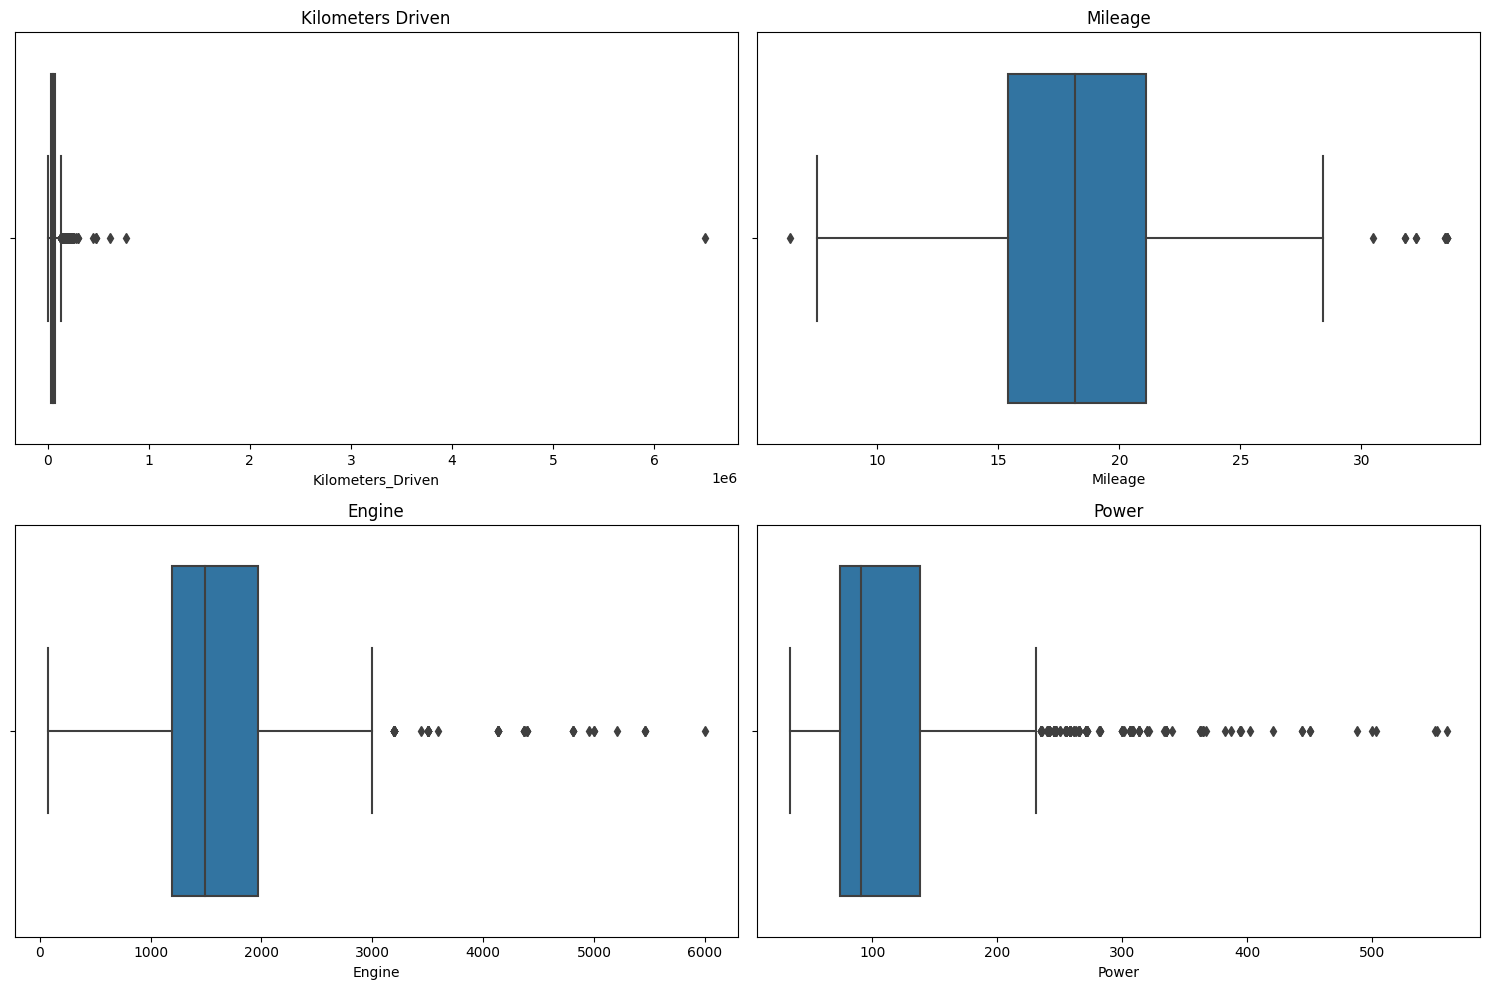

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for Kilometers_Driven
sns.boxplot(data=train, x='Kilometers_Driven', ax=axes[0, 0])
axes[0, 0].set_title('Kilometers Driven')

# Boxplot for Mileage
sns.boxplot(data=train, x='Mileage', ax=axes[0, 1])
axes[0, 1].set_title('Mileage')

# Boxplot for Engine
sns.boxplot(data=train, x='Engine', ax=axes[1, 0])
axes[1, 0].set_title('Engine')

# Boxplot for Power
sns.boxplot(data=train, x='Power', ax=axes[1, 1])
axes[1, 1].set_title('Power')

# Adjust layout
plt.tight_layout()
plt.show()


<h1>SCALING AND HANDLING OUTLIERS WITH ROBUST SCALAR:</H1>

In [34]:
from sklearn.preprocessing import RobustScaler

# Assuming 'train' is your DataFrame

# Selecting only the numeric columns
numeric_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']

# Creating a RobustScaler instance
scaler = RobustScaler()

# Fit and transform the selected numeric columns
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])

# Display the DataFrame after scaling
print(train.head())

                    Brand Location  Year  Kilometers_Driven Fuel_Type  \
0  Maruti Celerio VXI AMT    Delhi  2014          -0.463564    Petrol   
1         Audi Q5 2.0 TDI    Delhi  2013           0.454026    Diesel   
2        Toyota Etios VXD     Pune  2012           1.479667    Diesel   
3  Maruti Wagon R LXI CNG     Pune  2012           0.951462       CNG   
4  Maruti Wagon R AMT VXI   Jaipur  2016           0.393256    Petrol   

  Transmission Owner_Type   Mileage    Engine     Power  Seats  Selling_Price  \
0    Automatic     Second  0.866667 -0.642023 -0.375761    5.0           3.20   
1    Automatic      First -0.701754  0.616083  1.299391    5.0          21.50   
2       Manual      First  0.952632 -0.167315 -0.374824    5.0           4.75   
3       Manual      First  1.410526 -0.642023 -0.513822    5.0           2.90   
4    Automatic      First  0.412281 -0.642023 -0.376386    5.0           3.87   

   Brand1    Model    Version  
0  Maruti  Celerio    VXI AMT  
1    Audi 

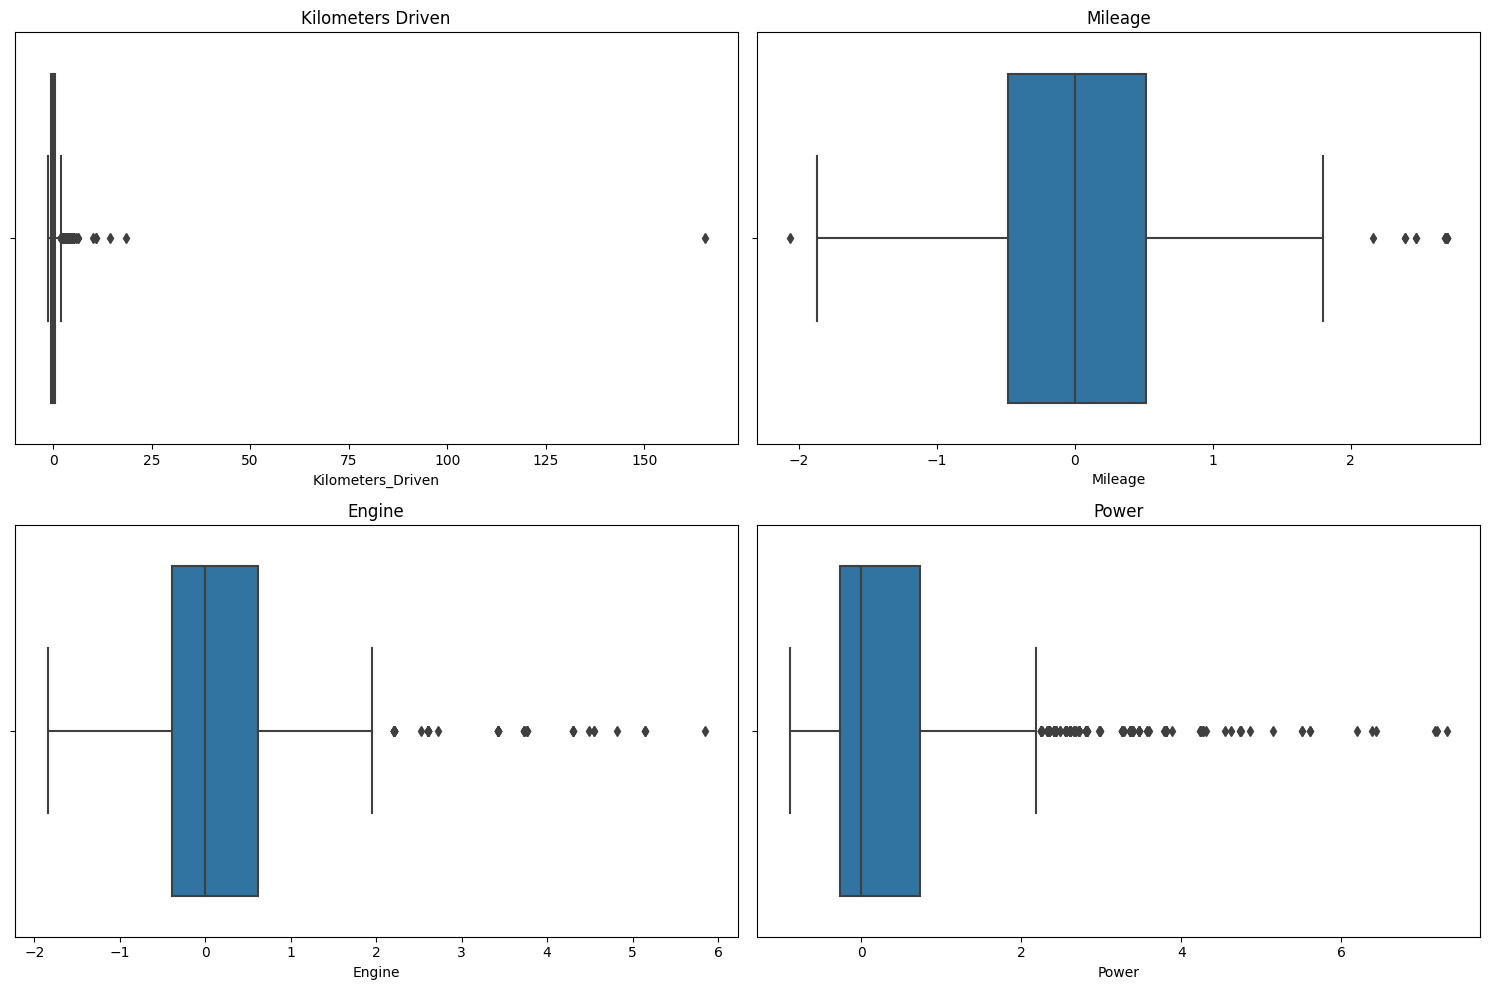

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for Kilometers_Driven
sns.boxplot(data=train, x='Kilometers_Driven', ax=axes[0, 0])
axes[0, 0].set_title('Kilometers Driven')

# Boxplot for Mileage
sns.boxplot(data=train, x='Mileage', ax=axes[0, 1])
axes[0, 1].set_title('Mileage')

# Boxplot for Engine
sns.boxplot(data=train, x='Engine', ax=axes[1, 0])
axes[1, 0].set_title('Engine')

# Boxplot for Power
sns.boxplot(data=train, x='Power', ax=axes[1, 1])
axes[1, 1].set_title('Power')

# Adjust layout
plt.tight_layout()
plt.show()


In [36]:
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,Delhi,2014,-0.463564,Petrol,Automatic,Second,0.866667,-0.642023,-0.375761,5.0,3.20,Maruti,Celerio,VXI AMT
1,Audi Q5 2.0 TDI,Delhi,2013,0.454026,Diesel,Automatic,First,-0.701754,0.616083,1.299391,5.0,21.50,Audi,Q5,2.0 TDI
2,Toyota Etios VXD,Pune,2012,1.479667,Diesel,Manual,First,0.952632,-0.167315,-0.374824,5.0,4.75,Toyota,Etios,VXD
3,Maruti Wagon R LXI CNG,Pune,2012,0.951462,CNG,Manual,First,1.410526,-0.642023,-0.513822,5.0,2.90,Maruti,Wagon,R LXI CNG
4,Maruti Wagon R AMT VXI,Jaipur,2016,0.393256,Petrol,Automatic,First,0.412281,-0.642023,-0.376386,5.0,3.87,Maruti,Wagon,R AMT VXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,-0.674179,Petrol,Automatic,First,-0.033333,0.006485,0.132750,5.0,6.75,Nissan,Sunny,2011-2014 XL AT Special Edition
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,-1.135718,Diesel,Automatic,First,-0.971930,0.914397,1.044823,7.0,32.90,Ford,Endeavour,2.2 Titanium AT 4X2
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,2.223256,Diesel,Manual,Second,-0.536842,0.889754,0.763705,7.0,9.00,Mahindra,XUV500,W8 2WD
5415,Honda Amaze S i-Dtech,Jaipur,2014,0.592846,Diesel,Manual,First,1.340351,0.006485,0.117133,5.0,4.95,Honda,Amaze,S i-Dtech


<br><H1> EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION:</H1><br>

In [37]:
train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Selling_Price
count,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000,5417.000000
mean,2013.363670,0.141893,0.028785,0.162277,0.328865,5.279306,9.453670
std,3.283659,2.438930,0.730069,0.780604,0.838505,0.805769,11.166658
min,1998.000000,-1.362103,-2.063158,-1.843061,-0.888646,2.000000,0.440000
25%,2011.000000,-0.494692,-0.484211,-0.383917,-0.267062,5.000000,3.500000
50%,2014.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.650000
75%,2016.000000,0.505308,0.515789,0.616083,0.732938,5.000000,9.900000
max,2019.000000,165.300179,2.698246,5.843061,7.323130,10.000000,160.000000


<Axes: >

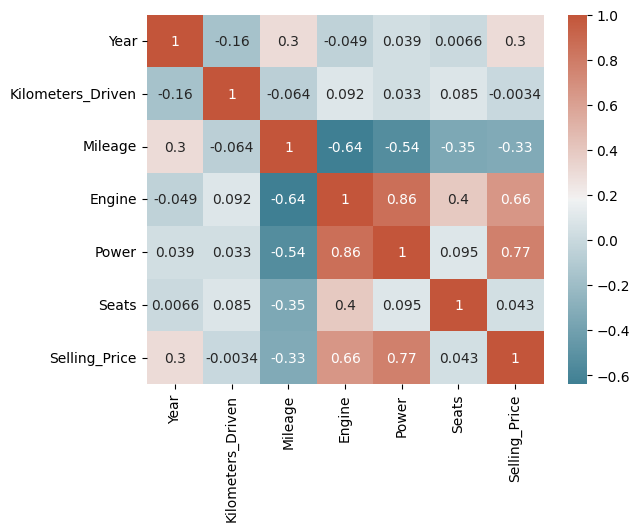

In [38]:
# Exclude non-numeric columns from the DataFrame
numeric_train = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
corr = numeric_train.corr()

# Create a heatmap of the correlation matrix
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sn.diverging_palette(220, 20, as_cmap=True))


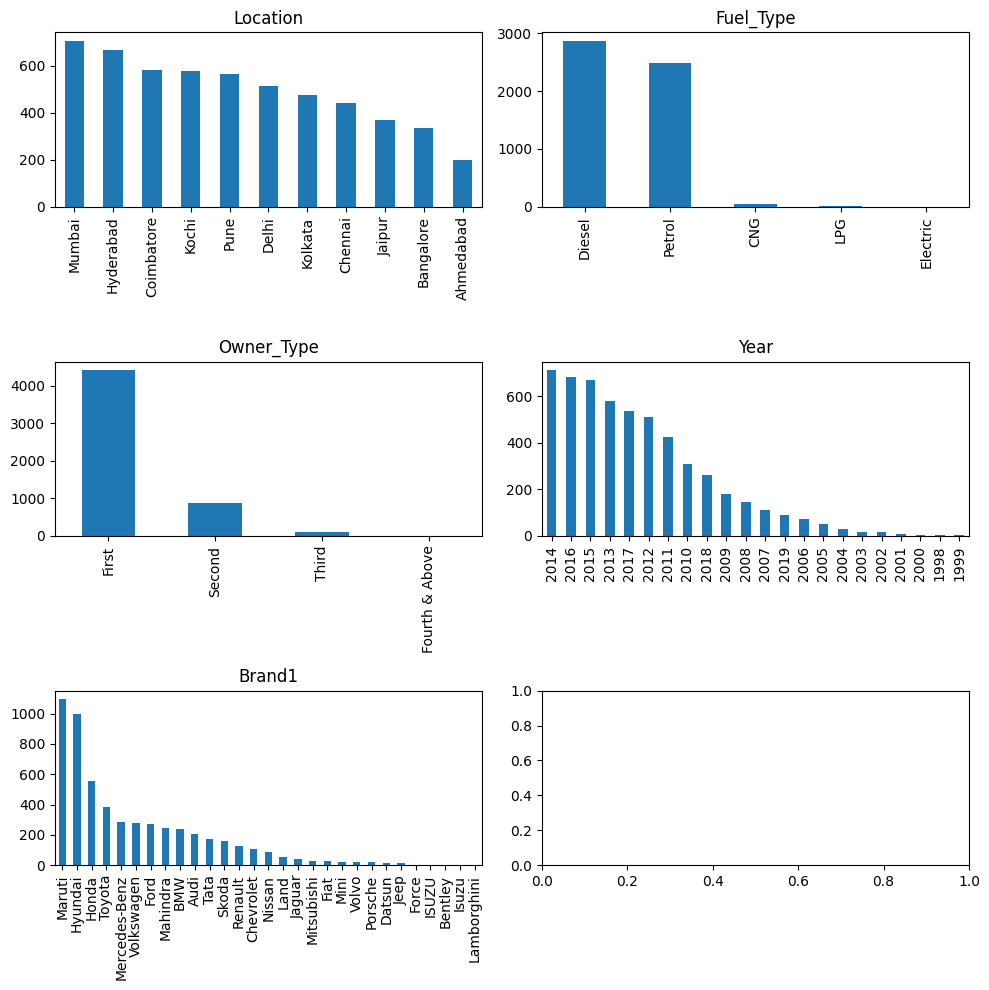

In [39]:
import matplotlib.pyplot as plt

# Assuming N is defined somewhere before this code
N = 10

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Plot 1: Location
train['Location'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Location')

# Plot 2: Fuel_Type
train['Fuel_Type'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Fuel_Type')

# Plot 3: Owner_Type
train['Owner_Type'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Owner_Type')

# Plot 4: Year
train['Year'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Year')

# Plot 5: Brand1
train['Brand1'].value_counts().plot(kind='bar', ax=axs[2, 0])
axs[2, 0].set_title('Brand1')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


In [40]:
pd.crosstab(train.Location, train.Owner_Type)

Owner_Type,First,Fourth & Above,Second,Third
Location,,,,
Ahmedabad,163,0,35,0
Bangalore,213,1,109,10
Chennai,298,2,106,33
Coimbatore,519,1,58,1
Delhi,422,0,87,3
Hyderabad,592,0,76,0
Jaipur,267,1,87,13
Kochi,540,0,32,3
Kolkata,448,0,27,0


<Axes: xlabel='Year', ylabel='Density'>

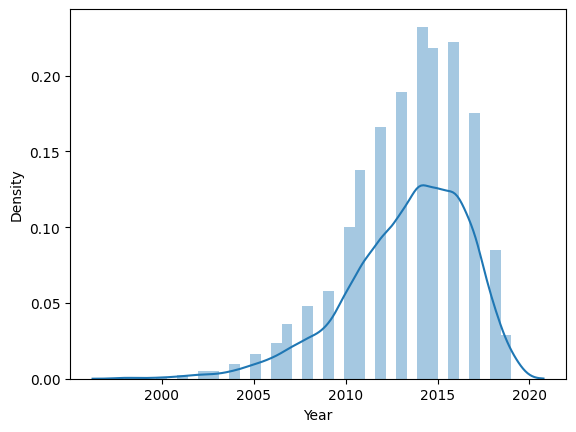

In [41]:
sn.distplot(train["Year"])

<Axes: xlabel='Selling_Price', ylabel='Density'>

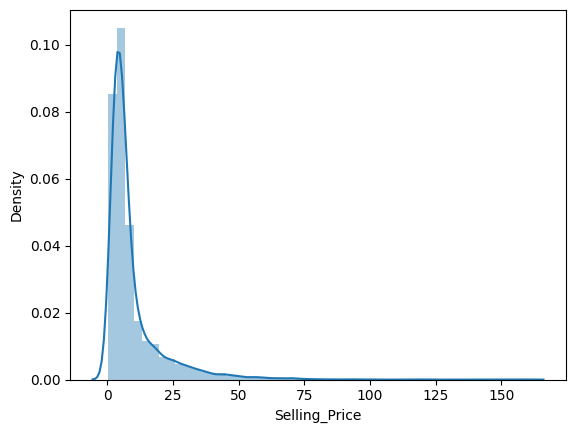

In [42]:
sn.distplot(train["Selling_Price"])

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

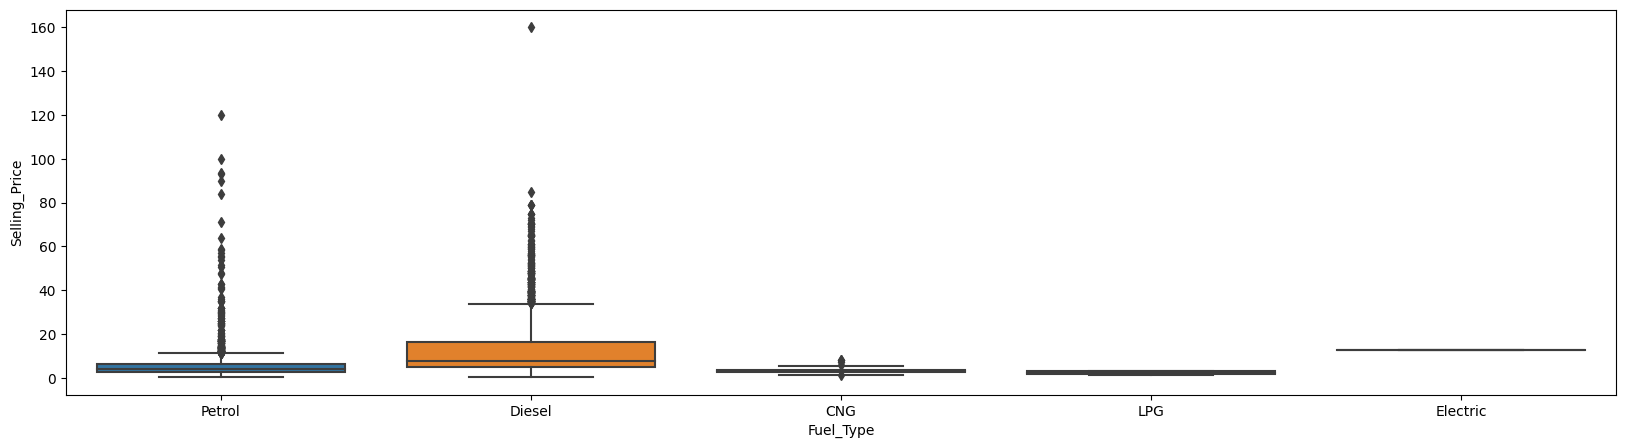

In [43]:
plt.figure(figsize=(20,5))
sn.boxplot(
    data=train,
    x='Fuel_Type',y='Selling_Price',
    )


<Axes: xlabel='Transmission', ylabel='Selling_Price'>

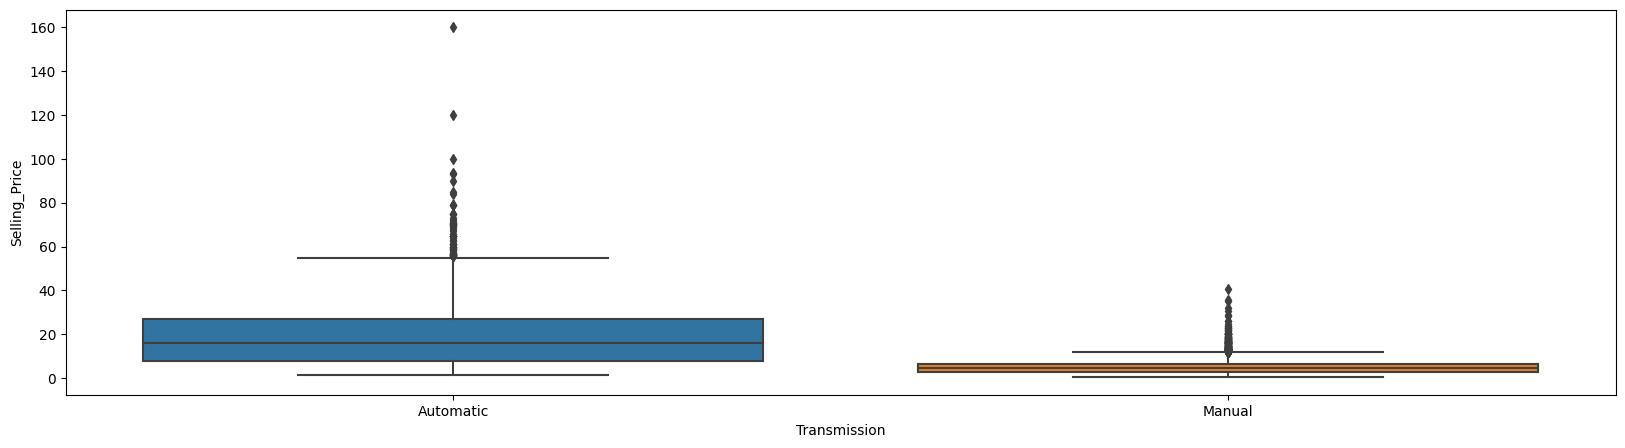

In [44]:
plt.figure(figsize=(20,5))
sn.boxplot(
    data=train,
    x='Transmission',y='Selling_Price',
   )


<Axes: xlabel='Owner_Type', ylabel='Selling_Price'>

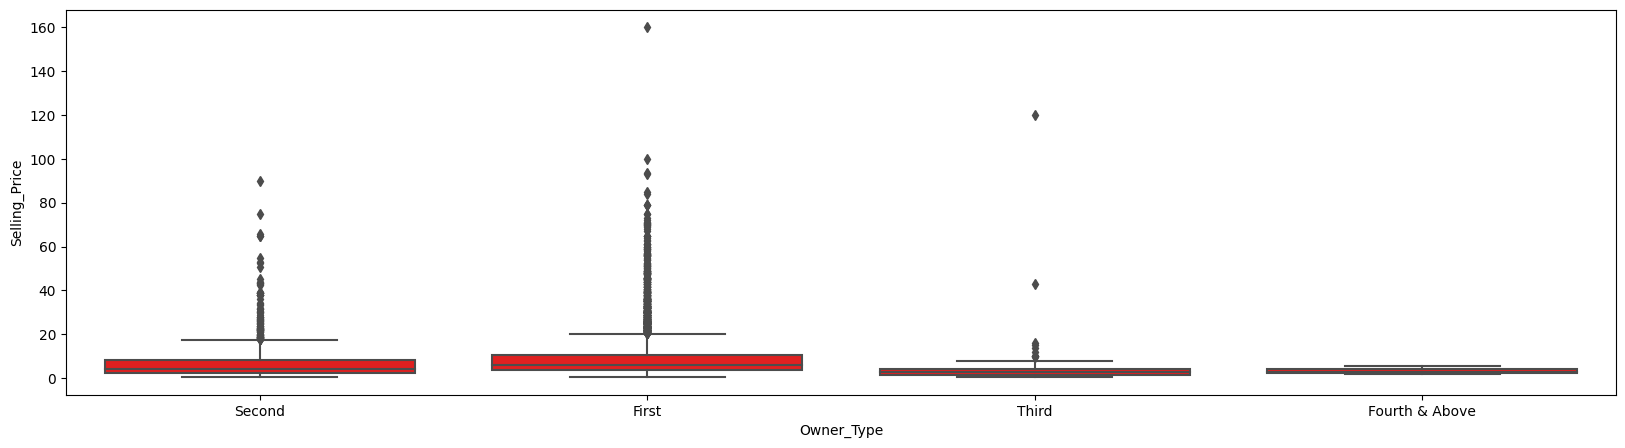

In [45]:
plt.figure(figsize=(20,5))
sn.boxplot(
    data=train,
    x='Owner_Type',y='Selling_Price',
    color='red')

<Axes: xlabel='Location', ylabel='Selling_Price'>

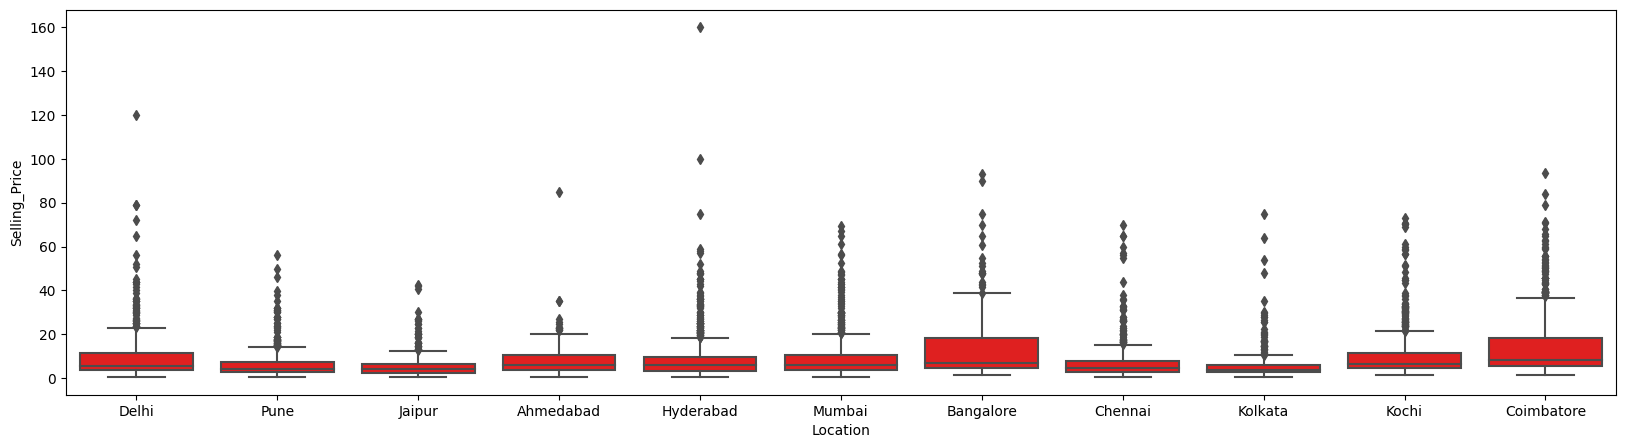

In [46]:
plt.figure(figsize=(20,5))
sn.boxplot(
    data=train,
    x='Location',y='Selling_Price',
    color='red')

<Axes: xlabel='Kilometers_Driven', ylabel='Selling_Price'>

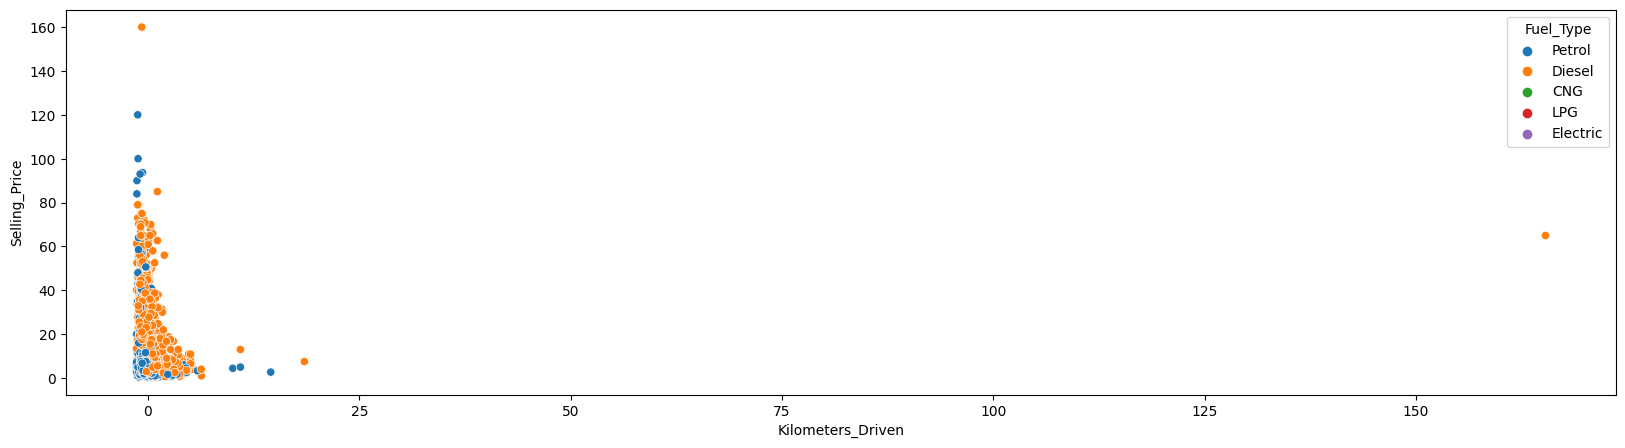

In [47]:
plt.figure(figsize=(20,5))
sn.scatterplot(x='Kilometers_Driven',y='Selling_Price',data=train, hue='Fuel_Type')

<Axes: xlabel='Kilometers_Driven', ylabel='Selling_Price'>

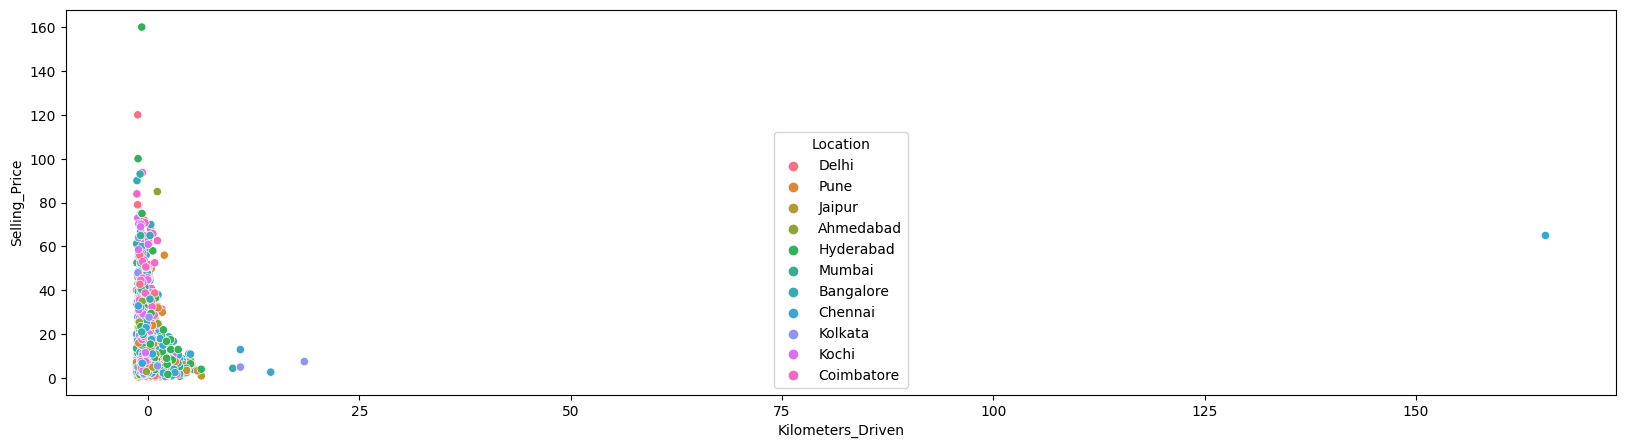

In [48]:
plt.figure(figsize=(20,5))
sn.scatterplot(x='Kilometers_Driven',y='Selling_Price',data=train, hue='Location')

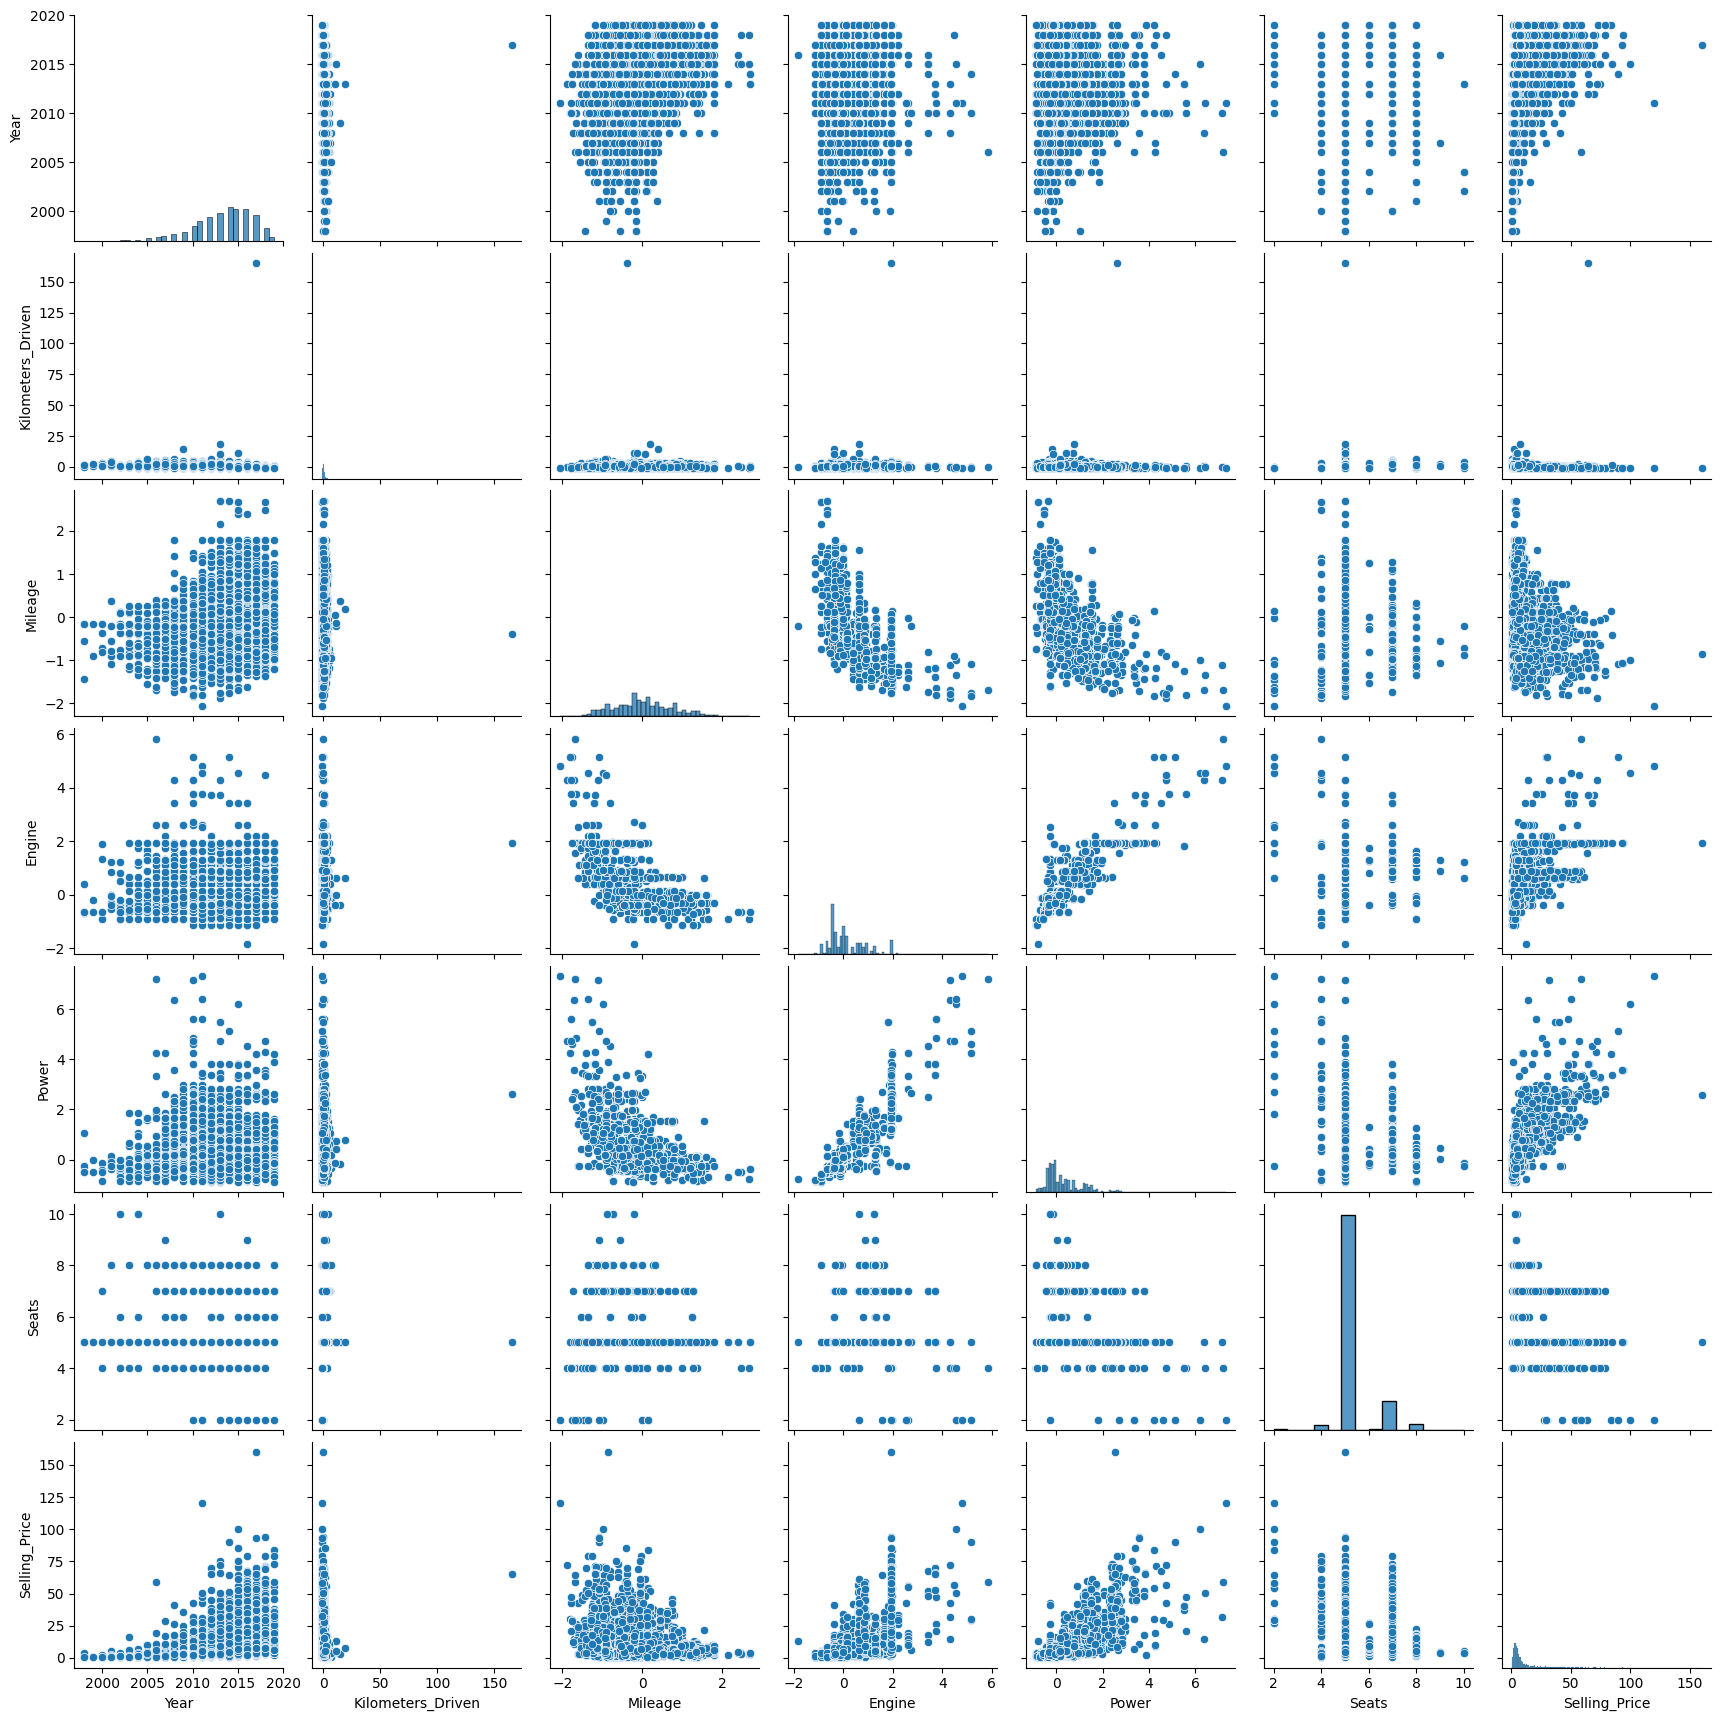

In [49]:
sn.pairplot(train)

<Axes: xlabel='Engine', ylabel='Selling_Price'>

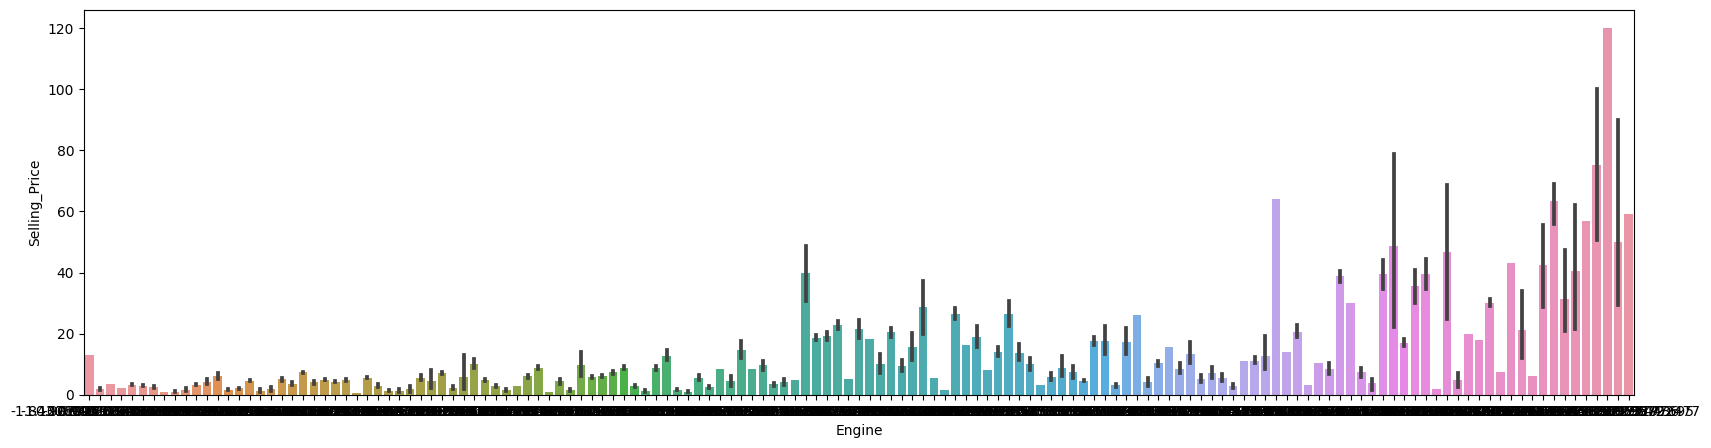

In [50]:
plt.figure(figsize=(20,5))
sn.barplot(x="Engine",y="Selling_Price",data=train)

In [51]:
train.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Selling_Price', 'Brand1', 'Model', 'Version'],
      dtype='object')

<Axes: xlabel='Kilometers_Driven', ylabel='Selling_Price'>

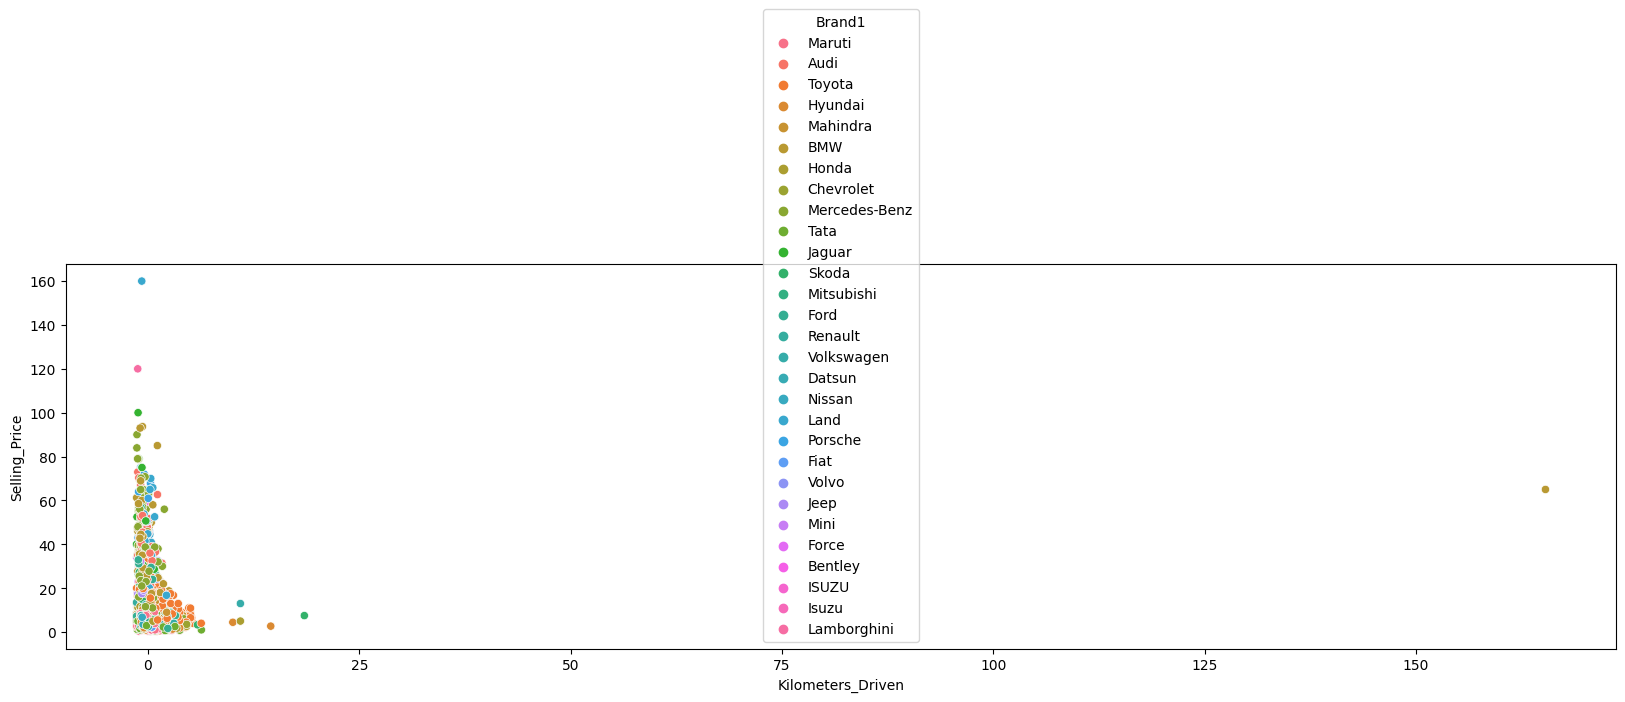

In [52]:
plt.figure(figsize=(20,5))
sn.scatterplot(x='Kilometers_Driven',y='Selling_Price',data=train, hue='Brand1')

<Axes: xlabel='Mileage', ylabel='Selling_Price'>

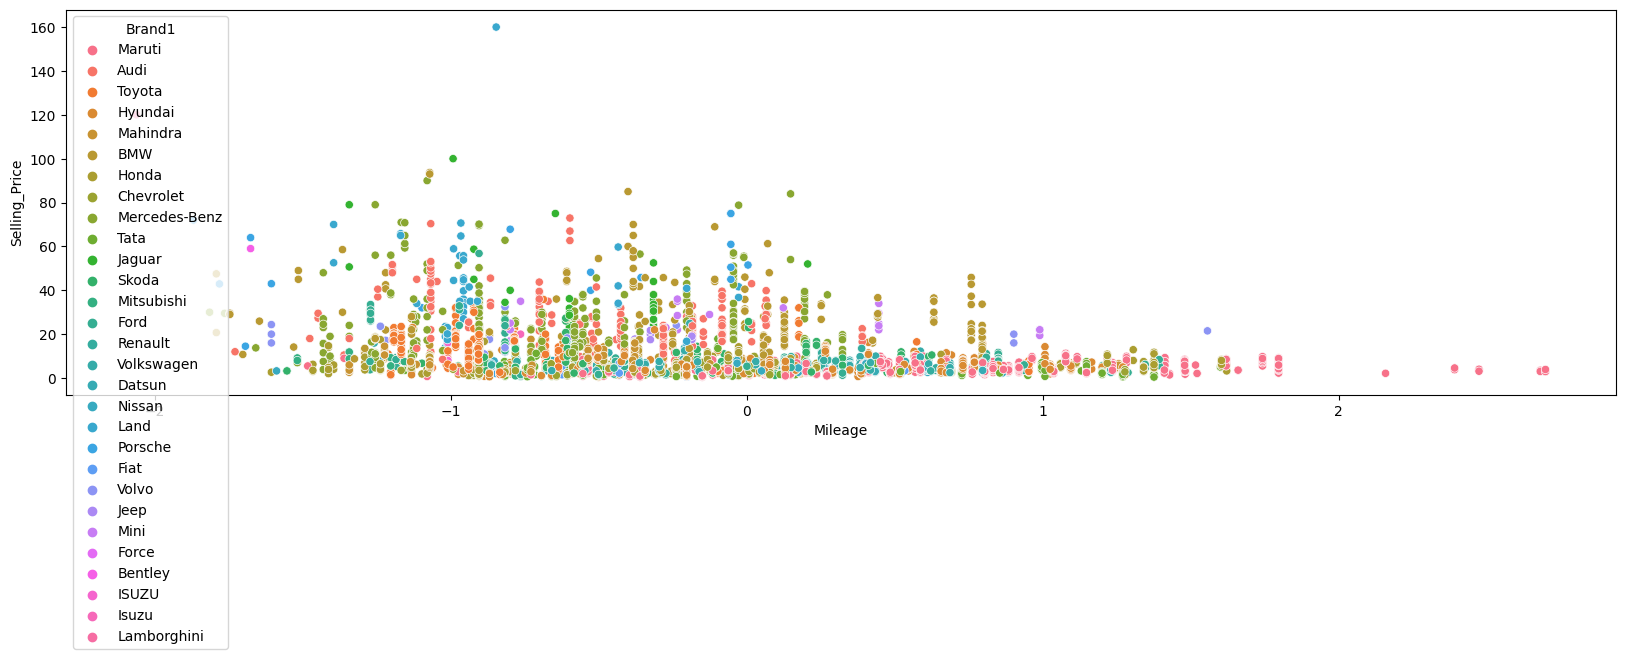

In [53]:
plt.figure(figsize=(20,5))
sn.scatterplot(x='Mileage',y='Selling_Price',data=train, hue='Brand1')

<Axes: xlabel='Engine', ylabel='Selling_Price'>

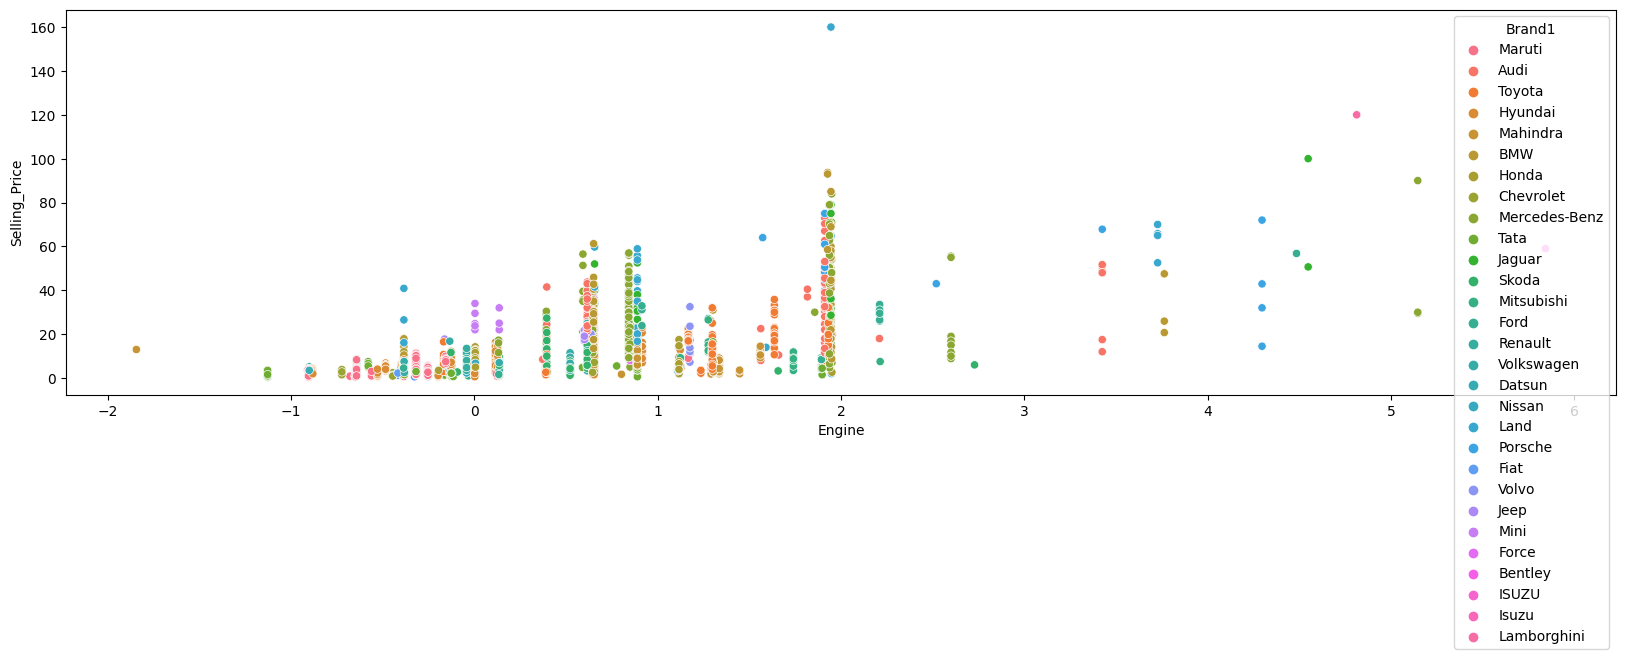

In [54]:
plt.figure(figsize=(20,5))
sn.scatterplot(x='Engine',y='Selling_Price',data=train, hue='Brand1')

<Axes: xlabel='Power', ylabel='Selling_Price'>

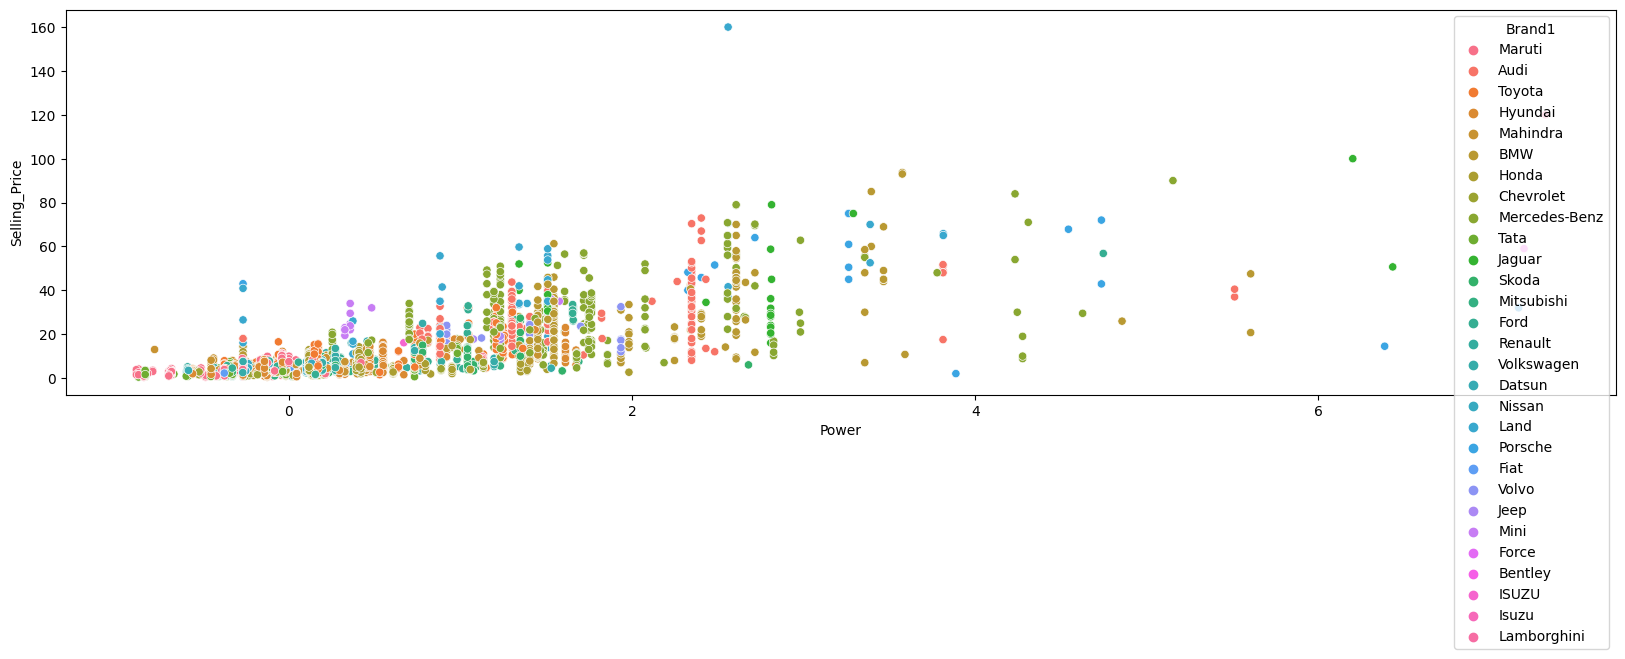

In [55]:
plt.figure(figsize=(20,5))
sn.scatterplot(x='Power',y='Selling_Price',data=train, hue='Brand1')

<Axes: xlabel='Selling_Price', ylabel='Brand1'>

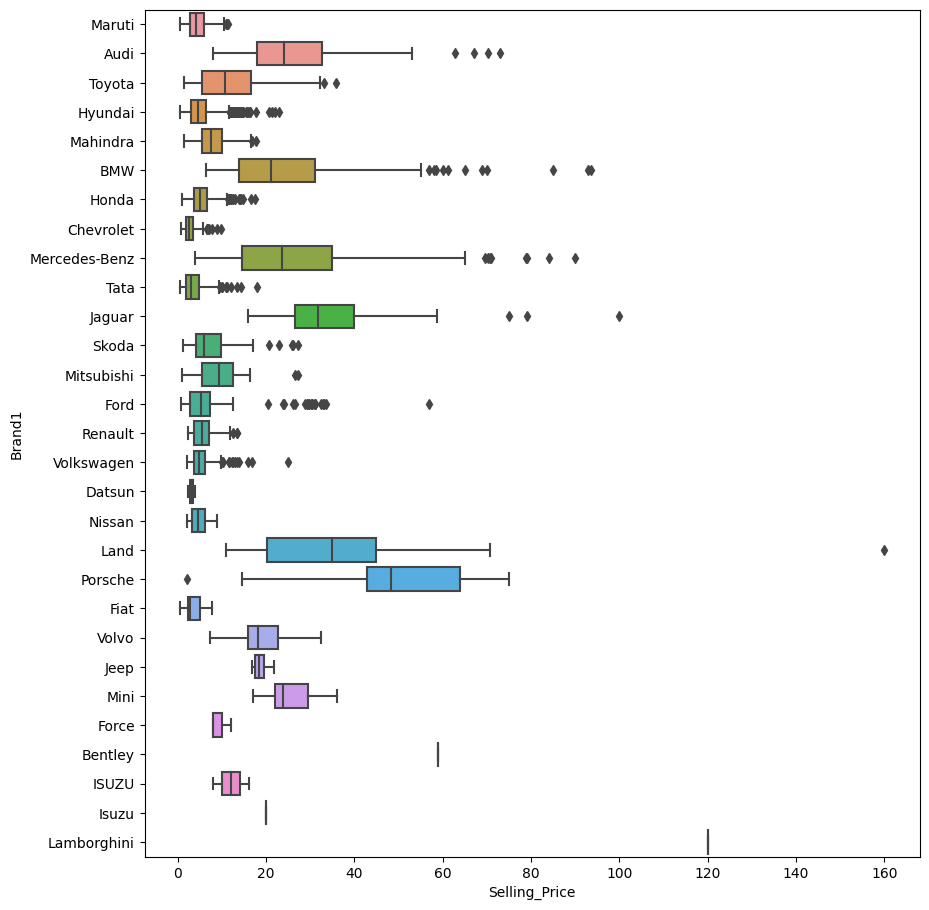

In [56]:
plt.figure(figsize=(10,11))
sn.boxplot(
    data=train,
    x='Selling_Price',y='Brand1')

In [57]:
pd.crosstab(train.Brand1,train.Location)

Location,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
Brand1,,,,,,,,,,,
Audi,8,29,9,46,24,29,3,19,14,23,4
BMW,13,19,23,30,17,26,5,20,10,46,26
Bentley,0,0,0,0,0,1,0,0,0,0,0
Chevrolet,2,5,8,11,3,8,8,13,16,11,19
Datsun,0,2,1,1,0,1,0,2,3,0,2
Fiat,0,0,2,4,1,2,3,2,5,2,3
Force,0,0,1,0,0,0,0,0,2,0,0
Ford,3,16,40,28,16,51,16,27,18,32,22
Honda,25,25,32,39,64,44,35,70,64,99,57


In [58]:
pd.crosstab(train.Brand,train.Fuel_Type)

Fuel_Type,CNG,Diesel,Electric,LPG,Petrol
Brand,,,,,
Audi A3 35 TDI Attraction,0,1,0,0,0
Audi A3 35 TDI Premium,0,1,0,0,0
Audi A3 35 TDI Premium Plus,0,1,0,0,0
Audi A3 35 TDI Technology,0,1,0,0,0
Audi A4 1.8 TFSI,0,0,0,0,1
...,...,...,...,...,...
Volvo XC60 D4 Summum,0,1,0,0,0
Volvo XC60 D5,0,3,0,0,0
Volvo XC60 D5 Inscription,0,1,0,0,0


In [59]:
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,Delhi,2014,-0.463564,Petrol,Automatic,Second,0.866667,-0.642023,-0.375761,5.0,3.20,Maruti,Celerio,VXI AMT
1,Audi Q5 2.0 TDI,Delhi,2013,0.454026,Diesel,Automatic,First,-0.701754,0.616083,1.299391,5.0,21.50,Audi,Q5,2.0 TDI
2,Toyota Etios VXD,Pune,2012,1.479667,Diesel,Manual,First,0.952632,-0.167315,-0.374824,5.0,4.75,Toyota,Etios,VXD
3,Maruti Wagon R LXI CNG,Pune,2012,0.951462,CNG,Manual,First,1.410526,-0.642023,-0.513822,5.0,2.90,Maruti,Wagon,R LXI CNG
4,Maruti Wagon R AMT VXI,Jaipur,2016,0.393256,Petrol,Automatic,First,0.412281,-0.642023,-0.376386,5.0,3.87,Maruti,Wagon,R AMT VXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,-0.674179,Petrol,Automatic,First,-0.033333,0.006485,0.132750,5.0,6.75,Nissan,Sunny,2011-2014 XL AT Special Edition
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,-1.135718,Diesel,Automatic,First,-0.971930,0.914397,1.044823,7.0,32.90,Ford,Endeavour,2.2 Titanium AT 4X2
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,2.223256,Diesel,Manual,Second,-0.536842,0.889754,0.763705,7.0,9.00,Mahindra,XUV500,W8 2WD
5415,Honda Amaze S i-Dtech,Jaipur,2014,0.592846,Diesel,Manual,First,1.340351,0.006485,0.117133,5.0,4.95,Honda,Amaze,S i-Dtech


<H1><i> TEST DATA <i><H1>

<h1>DATA COLLECTION<BR><h1>


In [60]:
test_x = pd.read_csv(r"/content/test_data.csv")
print(test_x.head())


                             Brand   Location  Year  Kilometers_Driven  \
0           Maruti Swift Dzire VDI  Hyderabad  2013              69000   
1    Mahindra Scorpio 1.99 S4 Plus      Kochi  2017              26741   
2           Mahindra XUV500 W8 2WD      Delhi  2014              86000   
3               Tata Indigo CS eVX       Pune  2016              52000   
4  Hyundai Santro GLS II - Euro II       Pune  2009             100000   

  Fuel_Type Transmission Owner_Type    Mileage   Engine      Power  Seats  
0    Diesel       Manual      First  23.4 kmpl  1248 CC     74 bhp    5.0  
1    Diesel       Manual      First  15.4 kmpl  1997 CC    120 bhp    7.0  
2    Diesel       Manual      First  15.1 kmpl  2179 CC    140 bhp    7.0  
3    Diesel       Manual     Second  25.0 kmpl  1396 CC  69.01 bhp    5.0  
4    Petrol       Manual      First   0.0 kmpl      NaN        NaN    NaN  


In [61]:
test_x.shape

(602, 11)

In [62]:
test_x.describe()

,Year,Kilometers_Driven,Seats
count,602.000000,602.000000,598.000000
mean,2013.308970,57942.551495,5.264214
std,3.143948,43329.671873,0.785392
min,2003.000000,1000.000000,2.000000
25%,2011.000000,32391.500000,5.000000
50%,2014.000000,52308.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,720000.000000,10.000000


In [63]:
test_x.describe

<bound method NDFrame.describe of                                               Brand   Location  Year  \
0                            Maruti Swift Dzire VDI  Hyderabad  2013   
1                     Mahindra Scorpio 1.99 S4 Plus      Kochi  2017   
2                            Mahindra XUV500 W8 2WD      Delhi  2014   
3                                Tata Indigo CS eVX       Pune  2016   
4                   Hyundai Santro GLS II - Euro II       Pune  2009   
..                                              ...        ...   ...   
597        Toyota Corolla Altis 2008-2013 1.8 VL AT     Mumbai  2008   
598                           Hyundai i10 Magna 1.2    Chennai  2012   
599                          Maruti Swift Dzire VDi     Jaipur  2010   
600  Mercedes-Benz E-Class 2015-2017 E250 Edition E  Ahmedabad  2016   
601                           Hyundai i10 Sportz AT  Ahmedabad  2012   

     Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0                690

<h1> DATA CLEANING:</H1>

<H2> Removing Null Values </h2>

In [64]:
test_x.isnull().sum()

Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              1
Engine               2
Power                2
Seats                4
dtype: int64

In [65]:

# Find and replace specific values with NaN for each column in test_x
replacement_dict = {
    '0.0 kmpl': np.NaN,  # Replace '0.0' with NaN in the 'Mileage' column
    'null bhp': np.NaN,  # Replace 'null' with NaN in the 'Power' column (assuming 'null' is a placeholder for missing values)
    0: np.NaN  # Replace 0 with NaN in other numeric columns, adjust this based on your dataset
}

test_x = test_x.replace(replacement_dict)

# Display the first 50 rows of the modified DataFrame
print(test_x.head(50))


                                               Brand    Location  Year  \
0                             Maruti Swift Dzire VDI   Hyderabad  2013   
1                      Mahindra Scorpio 1.99 S4 Plus       Kochi  2017   
2                             Mahindra XUV500 W8 2WD       Delhi  2014   
3                                 Tata Indigo CS eVX        Pune  2016   
4                    Hyundai Santro GLS II - Euro II        Pune  2009   
5                                Honda Accord 2.4 AT      Mumbai  2008   
6                                  Nissan Terrano XL      Mumbai  2014   
7                                    Maruti Ritz VDi      Jaipur  2013   
8                         Honda CR-V 2.4L 4WD AT AVN     Kolkata  2013   
9                                    Maruti Ritz VXI   Hyderabad  2012   
10              Audi A4 2.0 TDI 177 Bhp Premium Plus   Bangalore  2013   
11                                   Honda Brio E MT   Bangalore  2013   
12                              Ford F

In [66]:
test_x.isnull().sum()


Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              13
Engine                2
Power                14
Seats                 4
dtype: int64

In [67]:
# Check unique values in the 'Mileage' column
unique_mileage_values_test = test_x['Mileage'].unique()
print("Unique values in 'Mileage' (test_x):", unique_mileage_values_test)

# Check unique values in the 'Engine' column
unique_engine_values_test = test_x['Engine'].unique()
print("Unique values in 'Engine' (test_x):", unique_engine_values_test)

# Check unique values in the 'Power' column
unique_power_values_test = test_x['Power'].unique()
print("Unique values in 'Power' (test_x):", unique_power_values_test)

# Check unique values in the 'Seats' column
unique_seats_values_test = test_x['Seats'].unique()
print("Unique values in 'Seats' (test_x):", unique_seats_values_test)


Unique values in 'Mileage' (test_x): ['23.4 kmpl' '15.4 kmpl' '15.1 kmpl' '25.0 kmpl' nan '11.7 kmpl'
 '13.24 kmpl' '23.2 kmpl' '12.0 kmpl' '21.1 kmpl' '17.11 kmpl' '19.4 kmpl'
 '20.0 kmpl' '23.1 kmpl' '26.6 km/kg' '17.8 kmpl' '18.6 kmpl' '12.7 kmpl'
 '19.5 kmpl' '21.4 kmpl' '28.09 kmpl' '18.5 kmpl' '21.5 kmpl' '17.0 kmpl'
 '16.55 kmpl' '24.3 kmpl' '19.16 kmpl' '13.58 kmpl' '18.12 kmpl'
 '15.0 kmpl' '15.3 kmpl' '19.2 km/kg' '13.5 kmpl' '21.38 kmpl' '13.7 kmpl'
 '23.59 kmpl' '22.69 kmpl' '20.51 kmpl' '19.6 kmpl' '28.4 kmpl'
 '12.8 kmpl' '19.27 kmpl' '10.93 kmpl' '19.01 kmpl' '15.26 kmpl'
 '18.88 kmpl' '16.95 kmpl' '20.5 kmpl' '20.54 kmpl' '16.0 kmpl'
 '11.5 kmpl' '17.01 kmpl' '13.22 kmpl' '12.99 kmpl' '17.2 kmpl'
 '12.9 kmpl' '20.77 kmpl' '19.08 kmpl' '16.82 kmpl' '8.7 kmpl' '25.2 kmpl'
 '18.0 kmpl' '16.3 kmpl' '16.2 kmpl' '20.45 kmpl' '17.57 kmpl'
 '16.52 kmpl' '16.47 kmpl' '18.9 kmpl' '12.07 kmpl' '13.0 kmpl'
 '18.15 kmpl' '15.04 kmpl' '22.48 kmpl' '22.9 kmpl' '22.5 kmpl'
 '15.6 kmpl'

In [68]:
# Count of 0 values for each feature in test_x
count_of_zerosBrand = (test_x['Brand'] == 0).sum()
count_of_zerosLocation = (test_x['Location'] == 0).sum()
count_of_zerosYear = (test_x['Year'] == 0).sum()
count_of_zerosKilometers_Driven = (test_x['Kilometers_Driven'] == 0).sum()
count_of_zerosFuel_Type = (test_x['Fuel_Type'] == 0).sum()
count_of_zerosTransmission = (test_x['Transmission'] == 0).sum()
count_of_zerosOwner_Type = (test_x['Owner_Type'] == 0).sum()
count_of_zerosMileage = (test_x['Mileage'] == 0).sum()
count_of_zerosEngine = (test_x['Engine'] == 0).sum()
count_of_zerosPower = (test_x['Power'] == 0).sum()
count_of_zerosSeats = (test_x['Seats'] == 0).sum()


# Print the counts
print("Count of 0 values in 'Brand' column:", count_of_zerosBrand)
print("Count of 0 values in 'Location' column:", count_of_zerosLocation)
print("Count of 0 values in 'Year' column:", count_of_zerosYear)
print("Count of 0 values in 'Kilometers_Driven' column:", count_of_zerosKilometers_Driven)
print("Count of 0 values in 'Fuel_Type' column:", count_of_zerosFuel_Type)
print("Count of 0 values in 'Transmission' column:", count_of_zerosTransmission)
print("Count of 0 values in 'Owner_Type' column:", count_of_zerosOwner_Type)
print("Count of 0 values in 'Mileage' column:", count_of_zerosMileage)
print("Count of 0 values in 'Engine' column:", count_of_zerosEngine)
print("Count of 0 values in 'Power' column:", count_of_zerosPower)
print("Count of 0 values in 'Seats' column:", count_of_zerosSeats)



Count of 0 values in 'Brand' column: 0
Count of 0 values in 'Location' column: 0
Count of 0 values in 'Year' column: 0
Count of 0 values in 'Kilometers_Driven' column: 0
Count of 0 values in 'Fuel_Type' column: 0
Count of 0 values in 'Transmission' column: 0
Count of 0 values in 'Owner_Type' column: 0
Count of 0 values in 'Mileage' column: 0
Count of 0 values in 'Engine' column: 0
Count of 0 values in 'Power' column: 0
Count of 0 values in 'Seats' column: 0


In [69]:
# Define a function for imputing missing values with mode
def impute_with_mode(data, column):
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)
    print(f"Mode of {column}: {mode_value}")

    # Check if there are any missing values left in the column after imputation
    missing_values = data[column].isnull().sum()
    print(f"Missing values in {column} column after imputation: {missing_values}")

# Columns to impute
columns_to_impute = ['Mileage', 'Engine', 'Power', 'Seats']

# Impute missing values for each specified column in the test_x DataFrame
for column in columns_to_impute:
    impute_with_mode(test_x, column)


Mode of Mileage: 18.9 kmpl
Missing values in Mileage column after imputation: 0
Mode of Engine: 1197 CC
Missing values in Engine column after imputation: 0
Mode of Power: 74 bhp
Missing values in Power column after imputation: 0
Mode of Seats: 5.0
Missing values in Seats column after imputation: 0


In [70]:
# Removing units from Mileage, Engine, and Power columns in the 'test_x' DataFrame
test_x['Mileage'] = test_x['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
test_x['Mileage'] = test_x['Mileage'].apply(lambda x: str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))

test_x['Engine'] = test_x['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))

test_x['Power'] = test_x['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))


In [71]:
# Converting 'Mileage' to float
test_x['Mileage'] = test_x['Mileage'].astype('float')

# Converting 'Engine' to float
test_x['Engine'] = test_x['Engine'].astype('float')

# Converting 'Power' to float
test_x['Power'] = test_x['Power'].astype('float')

# Display the updated data types
print(test_x.dtypes)


Brand                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object


In [72]:
test_x.isnull().sum()

Brand                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [73]:
test_x.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [74]:
test_x.dtypes

Brand                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object

In [75]:
# Splitting 'Brand1' into 'Brand', 'Model', and 'Version' in test_x DataFrame
test_x['Brand1'] = test_x['Brand'].str.split(' ').str[0]
test_x['Model'] = test_x['Brand'].str.split(' ').str[1]
test_x['Version'] = test_x['Brand'].str.split(' ').str[2:7].str.join(" ")


In [76]:
test=test_x
test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,Maruti,Swift,Dzire VDI
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.40,1997.0,120.00,7.0,Mahindra,Scorpio,1.99 S4 Plus
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.10,2179.0,140.00,7.0,Mahindra,XUV500,W8 2WD
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.00,1396.0,69.01,5.0,Tata,Indigo,CS eVX
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,18.90,1197.0,74.00,5.0,Hyundai,Santro,GLS II - Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,78000,Petrol,Automatic,Second,14.53,1794.0,138.10,5.0,Toyota,Corolla,Altis 2008-2013 1.8 VL AT
598,Hyundai i10 Magna 1.2,Chennai,2012,55231,Petrol,Manual,Second,20.36,1197.0,78.90,5.0,Hyundai,i10,Magna 1.2
599,Maruti Swift Dzire VDi,Jaipur,2010,130000,Diesel,Manual,Second,19.30,1248.0,73.90,5.0,Maruti,Swift,Dzire VDi
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,Ahmedabad,2016,39500,Diesel,Automatic,First,15.00,2143.0,204.00,5.0,Mercedes-Benz,E-Class,2015-2017 E250 Edition E


In [77]:
test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,Maruti,Swift,Dzire VDI
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.40,1997.0,120.00,7.0,Mahindra,Scorpio,1.99 S4 Plus
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.10,2179.0,140.00,7.0,Mahindra,XUV500,W8 2WD
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.00,1396.0,69.01,5.0,Tata,Indigo,CS eVX
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,18.90,1197.0,74.00,5.0,Hyundai,Santro,GLS II - Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,78000,Petrol,Automatic,Second,14.53,1794.0,138.10,5.0,Toyota,Corolla,Altis 2008-2013 1.8 VL AT
598,Hyundai i10 Magna 1.2,Chennai,2012,55231,Petrol,Manual,Second,20.36,1197.0,78.90,5.0,Hyundai,i10,Magna 1.2
599,Maruti Swift Dzire VDi,Jaipur,2010,130000,Diesel,Manual,Second,19.30,1248.0,73.90,5.0,Maruti,Swift,Dzire VDi
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,Ahmedabad,2016,39500,Diesel,Automatic,First,15.00,2143.0,204.00,5.0,Mercedes-Benz,E-Class,2015-2017 E250 Edition E


<h1>SCALING</h1>

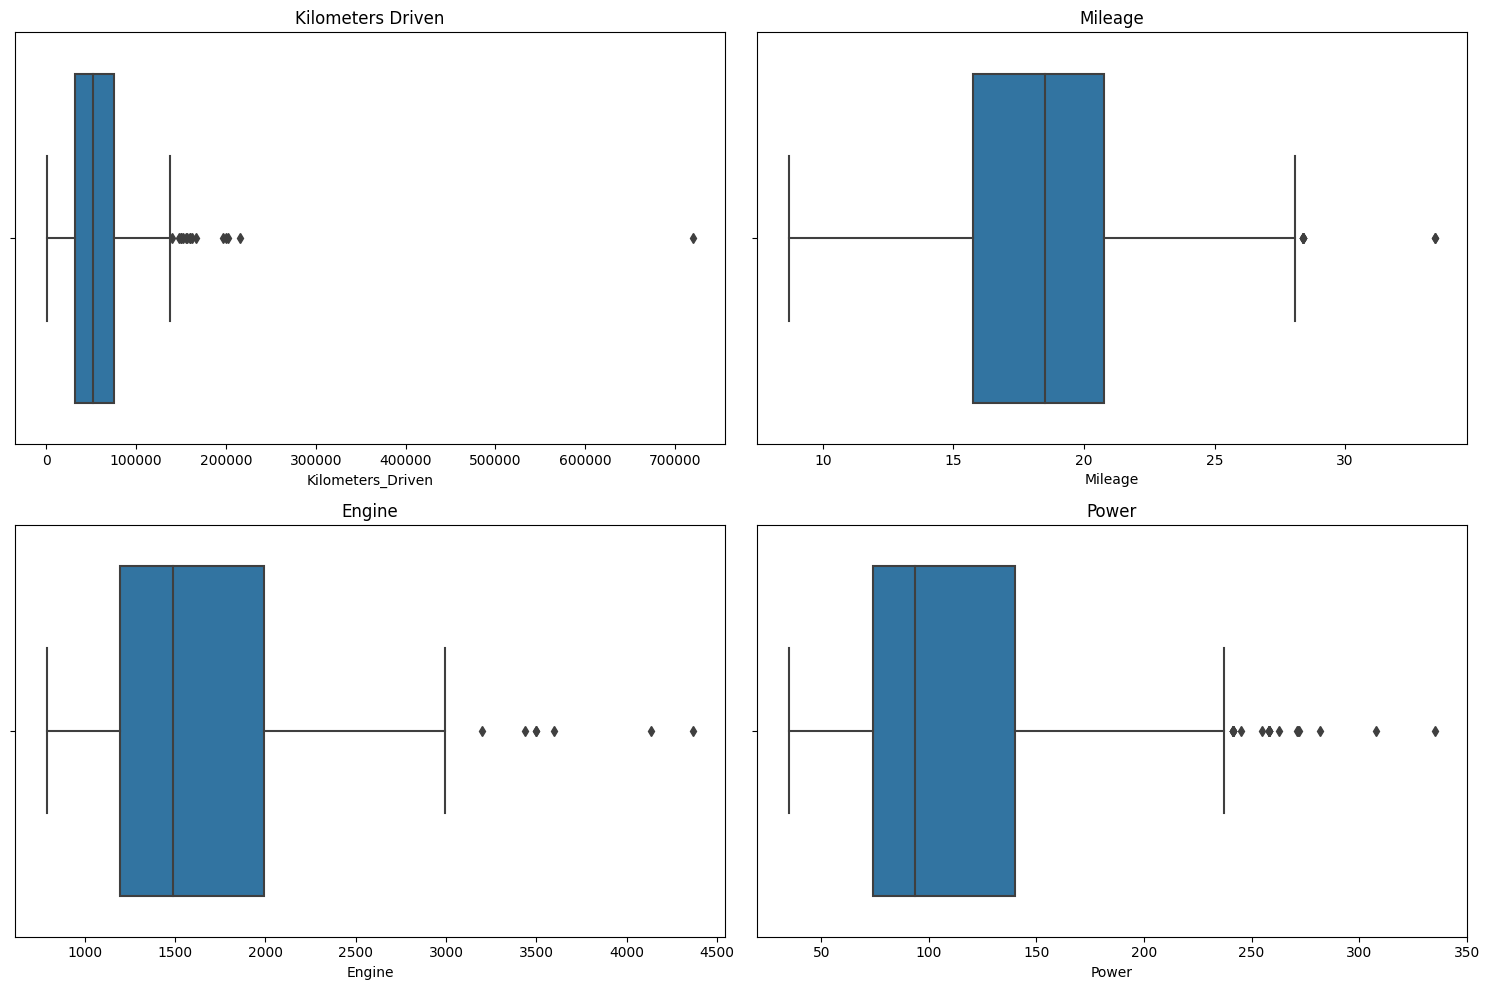

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for Kilometers_Driven
sns.boxplot(data=test_x, x='Kilometers_Driven', ax=axes[0, 0])
axes[0, 0].set_title('Kilometers Driven')

# Boxplot for Mileage
sns.boxplot(data=test_x, x='Mileage', ax=axes[0, 1])
axes[0, 1].set_title('Mileage')

# Boxplot for Engine
sns.boxplot(data=test_x, x='Engine', ax=axes[1, 0])
axes[1, 0].set_title('Engine')

# Boxplot for Power
sns.boxplot(data=test_x, x='Power', ax=axes[1, 1])
axes[1, 1].set_title('Power')

# Adjust layout
plt.tight_layout()
plt.show()


In [79]:
from sklearn.preprocessing import RobustScaler


# Selecting only the numeric columns
numeric_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power']

# Creating a RobustScaler instance
scaler = RobustScaler()

# Fit and transform the selected numeric columns
test_x[numeric_columns] = scaler.fit_transform(test_x[numeric_columns])

# Display the DataFrame after scaling
print(test_x.head())


                             Brand   Location  Year  Kilometers_Driven  \
0           Maruti Swift Dzire VDI  Hyderabad  2013           0.391741   
1    Mahindra Scorpio 1.99 S4 Plus      Kochi  2017          -0.600056   
2           Mahindra XUV500 W8 2WD      Delhi  2014           0.790723   
3               Tata Indigo CS eVX       Pune  2016          -0.007240   
4  Hyundai Santro GLS II - Euro II       Pune  2009           1.119295   

  Fuel_Type Transmission Owner_Type   Mileage    Engine     Power  Seats  \
0    Diesel       Manual      First  0.976629 -0.305276 -0.298485    5.0   
1    Diesel       Manual      First -0.614620  0.635678  0.398485    7.0   
2    Diesel       Manual      First -0.674291  0.864322  0.701515    7.0   
3    Diesel       Manual     Second  1.294878 -0.119347 -0.374091    5.0   
4    Petrol       Manual      First  0.081551 -0.369347 -0.298485    5.0   

     Brand1    Model           Version  
0    Maruti    Swift         Dzire VDI  
1  Mahindra  Sco

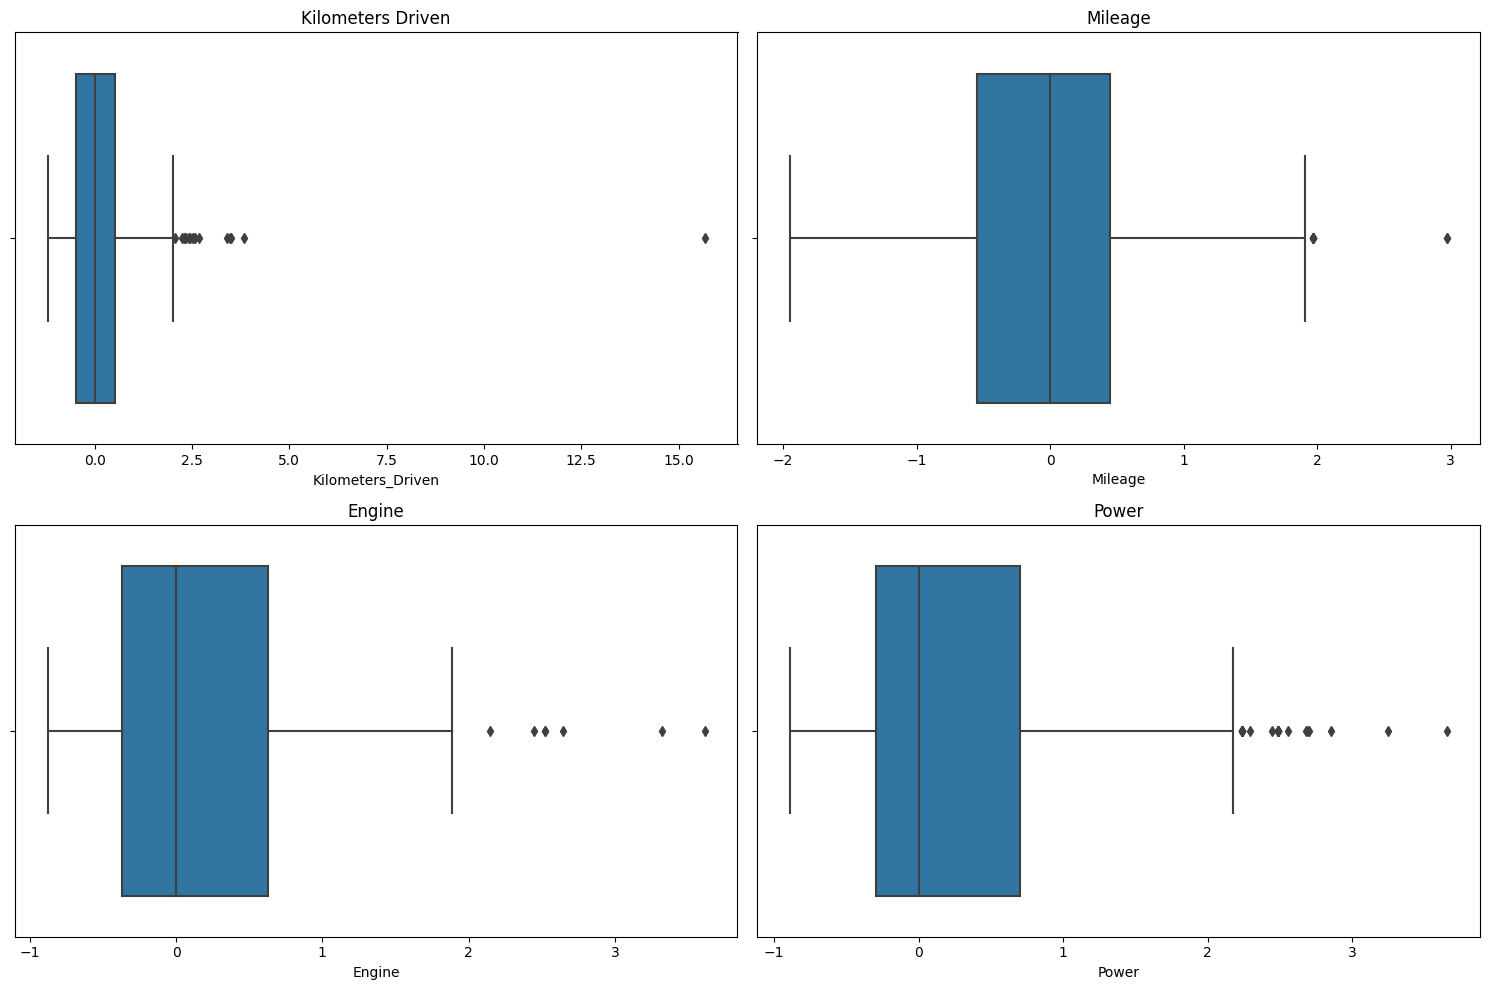

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot for Kilometers_Driven
sns.boxplot(data=test_x, x='Kilometers_Driven', ax=axes[0, 0])
axes[0, 0].set_title('Kilometers Driven')

# Boxplot for Mileage
sns.boxplot(data=test_x, x='Mileage', ax=axes[0, 1])
axes[0, 1].set_title('Mileage')

# Boxplot for Engine
sns.boxplot(data=test_x, x='Engine', ax=axes[1, 0])
axes[1, 0].set_title('Engine')

# Boxplot for Power
sns.boxplot(data=test_x, x='Power', ax=axes[1, 1])
axes[1, 1].set_title('Power')

# Adjust layout
plt.tight_layout()
plt.show()


In [81]:
test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version
0,Maruti Swift Dzire VDI,Hyderabad,2013,0.391741,Diesel,Manual,First,0.976629,-0.305276,-0.298485,5.0,Maruti,Swift,Dzire VDI
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,-0.600056,Diesel,Manual,First,-0.614620,0.635678,0.398485,7.0,Mahindra,Scorpio,1.99 S4 Plus
2,Mahindra XUV500 W8 2WD,Delhi,2014,0.790723,Diesel,Manual,First,-0.674291,0.864322,0.701515,7.0,Mahindra,XUV500,W8 2WD
3,Tata Indigo CS eVX,Pune,2016,-0.007240,Diesel,Manual,Second,1.294878,-0.119347,-0.374091,5.0,Tata,Indigo,CS eVX
4,Hyundai Santro GLS II - Euro II,Pune,2009,1.119295,Petrol,Manual,First,0.081551,-0.369347,-0.298485,5.0,Hyundai,Santro,GLS II - Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,2008,0.602967,Petrol,Automatic,Second,-0.787668,0.380653,0.672727,5.0,Toyota,Corolla,Altis 2008-2013 1.8 VL AT
598,Hyundai i10 Magna 1.2,Chennai,2012,0.068590,Petrol,Manual,Second,0.371954,-0.369347,-0.224242,5.0,Hyundai,i10,Magna 1.2
599,Maruti Swift Dzire VDi,Jaipur,2010,1.823380,Diesel,Manual,Second,0.161114,-0.305276,-0.300000,5.0,Maruti,Swift,Dzire VDi
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,Ahmedabad,2016,-0.300609,Diesel,Automatic,First,-0.694182,0.819095,1.671212,5.0,Mercedes-Benz,E-Class,2015-2017 E250 Edition E


<h1> LABEL ENCODING </h1>

In [82]:
train.dtypes

Brand                 object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Selling_Price        float64
Brand1                object
Model                 object
Version               object
dtype: object

In [83]:
test.dtypes

Brand                 object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand1                object
Model                 object
Version               object
dtype: object

In [84]:
#Creating dummy dataframe to create map of all possible unique column names provided in train and test files

In [85]:
train.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,Delhi,2014,-0.463564,Petrol,Automatic,Second,0.866667,-0.642023,-0.375761,5.0,3.20,Maruti,Celerio,VXI AMT
1,Audi Q5 2.0 TDI,Delhi,2013,0.454026,Diesel,Automatic,First,-0.701754,0.616083,1.299391,5.0,21.50,Audi,Q5,2.0 TDI
2,Toyota Etios VXD,Pune,2012,1.479667,Diesel,Manual,First,0.952632,-0.167315,-0.374824,5.0,4.75,Toyota,Etios,VXD
3,Maruti Wagon R LXI CNG,Pune,2012,0.951462,CNG,Manual,First,1.410526,-0.642023,-0.513822,5.0,2.90,Maruti,Wagon,R LXI CNG
4,Maruti Wagon R AMT VXI,Jaipur,2016,0.393256,Petrol,Automatic,First,0.412281,-0.642023,-0.376386,5.0,3.87,Maruti,Wagon,R AMT VXI


In [86]:
test.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version
0,Maruti Swift Dzire VDI,Hyderabad,2013,0.391741,Diesel,Manual,First,0.976629,-0.305276,-0.298485,5.0,Maruti,Swift,Dzire VDI
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,-0.600056,Diesel,Manual,First,-0.614620,0.635678,0.398485,7.0,Mahindra,Scorpio,1.99 S4 Plus
2,Mahindra XUV500 W8 2WD,Delhi,2014,0.790723,Diesel,Manual,First,-0.674291,0.864322,0.701515,7.0,Mahindra,XUV500,W8 2WD
3,Tata Indigo CS eVX,Pune,2016,-0.007240,Diesel,Manual,Second,1.294878,-0.119347,-0.374091,5.0,Tata,Indigo,CS eVX
4,Hyundai Santro GLS II - Euro II,Pune,2009,1.119295,Petrol,Manual,First,0.081551,-0.369347,-0.298485,5.0,Hyundai,Santro,GLS II - Euro II


In [87]:
# List all the column names
columns = train.columns
print(columns)


Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Selling_Price', 'Brand1', 'Model', 'Version'],
      dtype='object')


In [88]:
# List all the column names
columns = test.columns
print(columns)

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand1', 'Model', 'Version'],
      dtype='object')


In [89]:
# Specify the columns to one-hot encode
columns_to_encode = ['Fuel_Type', 'Transmission', 'Owner_Type']

# Perform one-hot encoding on the training data
train_encoded = pd.get_dummies(train, columns=columns_to_encode)

# Perform one-hot encoding on the test data
test_encoded = pd.get_dummies(test, columns=columns_to_encode)

In [90]:
import pandas as pd


# Specify the columns to one-hot encode
columns_to_encode = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Perform one-hot encoding
df_encoded = pd.get_dummies(train, columns=columns_to_encode, prefix=columns_to_encode)

# Display the first few rows and columns of the encoded DataFrame
print(train_encoded.head())


                    Brand Location  Year  Kilometers_Driven   Mileage  \
0  Maruti Celerio VXI AMT    Delhi  2014          -0.463564  0.866667   
1         Audi Q5 2.0 TDI    Delhi  2013           0.454026 -0.701754   
2        Toyota Etios VXD     Pune  2012           1.479667  0.952632   
3  Maruti Wagon R LXI CNG     Pune  2012           0.951462  1.410526   
4  Maruti Wagon R AMT VXI   Jaipur  2016           0.393256  0.412281   

     Engine     Power  Seats  Selling_Price  Brand1  ... Fuel_Type_Diesel  \
0 -0.642023 -0.375761    5.0           3.20  Maruti  ...                0   
1  0.616083  1.299391    5.0          21.50    Audi  ...                1   
2 -0.167315 -0.374824    5.0           4.75  Toyota  ...                1   
3 -0.642023 -0.513822    5.0           2.90  Maruti  ...                0   
4 -0.642023 -0.376386    5.0           3.87  Maruti  ...                0   

  Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  \
0                

In [91]:
train_encoded

,Brand,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Selling_Price,Brand1,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Celerio VXI AMT,Delhi,2014,-0.463564,0.866667,-0.642023,-0.375761,5.0,3.20,Maruti,...,0,0,0,1,1,0,0,0,1,0
1,Audi Q5 2.0 TDI,Delhi,2013,0.454026,-0.701754,0.616083,1.299391,5.0,21.50,Audi,...,1,0,0,0,1,0,1,0,0,0
2,Toyota Etios VXD,Pune,2012,1.479667,0.952632,-0.167315,-0.374824,5.0,4.75,Toyota,...,1,0,0,0,0,1,1,0,0,0
3,Maruti Wagon R LXI CNG,Pune,2012,0.951462,1.410526,-0.642023,-0.513822,5.0,2.90,Maruti,...,0,0,0,0,0,1,1,0,0,0
4,Maruti Wagon R AMT VXI,Jaipur,2016,0.393256,0.412281,-0.642023,-0.376386,5.0,3.87,Maruti,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,-0.674179,-0.033333,0.006485,0.132750,5.0,6.75,Nissan,...,0,0,0,1,1,0,1,0,0,0
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,-1.135718,-0.971930,0.914397,1.044823,7.0,32.90,Ford,...,1,0,0,0,1,0,1,0,0,0
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,2.223256,-0.536842,0.889754,0.763705,7.0,9.00,Mahindra,...,1,0,0,0,0,1,0,0,1,0
5415,Honda Amaze S i-Dtech,Jaipur,2014,0.592846,1.340351,0.006485,0.117133,5.0,4.95,Honda,...,1,0,0,0,0,1,1,0,0,0


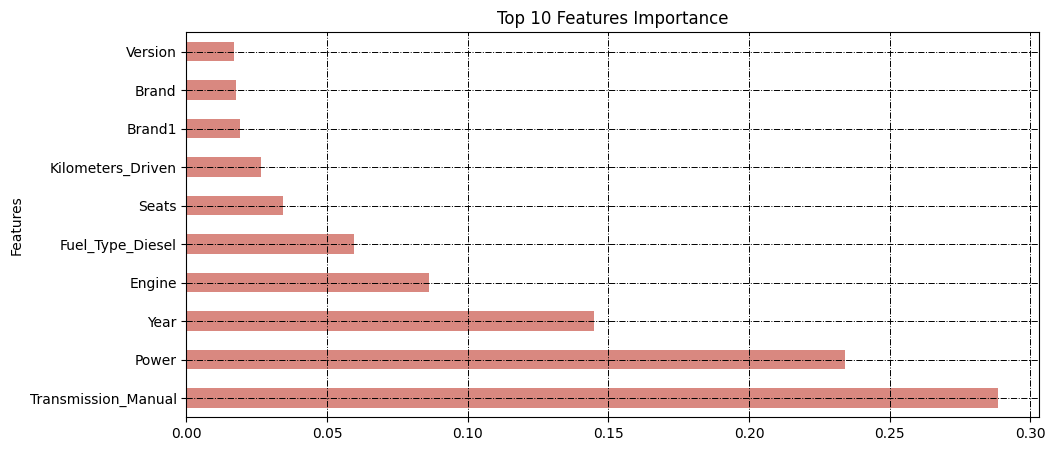

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Assuming train_encoded contains your input features and target variable
# Replace 'Selling_Price' with your actual target variable column name
df3_inputs = train_encoded.drop('Selling_Price', axis=1)
df3_target = train_encoded['Selling_Price']

# Label encode categorical columns
label_encoder = LabelEncoder()
for column in df3_inputs.select_dtypes(include=['object']).columns:
    df3_inputs[column] = label_encoder.fit_transform(df3_inputs[column])

# Initialize the ExtraTreesRegressor
model = ExtraTreesRegressor()

# Fit the model on the training data
model.fit(df3_inputs, df3_target)

# Use inbuilt class feature_importances of ExtraTreeRegressor
feat_importances = pd.Series(model.feature_importances_, index=df3_inputs.columns)

# Plot graph of feature importances for better visualization
plt.figure(figsize=(11, 5))
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Features Importance")
feat_importances.nlargest(10).plot(kind='barh', color='#D98880')  # You can change the color as desired
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()


In [93]:
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,Delhi,2014,-0.463564,Petrol,Automatic,Second,0.866667,-0.642023,-0.375761,5.0,3.20,Maruti,Celerio,VXI AMT
1,Audi Q5 2.0 TDI,Delhi,2013,0.454026,Diesel,Automatic,First,-0.701754,0.616083,1.299391,5.0,21.50,Audi,Q5,2.0 TDI
2,Toyota Etios VXD,Pune,2012,1.479667,Diesel,Manual,First,0.952632,-0.167315,-0.374824,5.0,4.75,Toyota,Etios,VXD
3,Maruti Wagon R LXI CNG,Pune,2012,0.951462,CNG,Manual,First,1.410526,-0.642023,-0.513822,5.0,2.90,Maruti,Wagon,R LXI CNG
4,Maruti Wagon R AMT VXI,Jaipur,2016,0.393256,Petrol,Automatic,First,0.412281,-0.642023,-0.376386,5.0,3.87,Maruti,Wagon,R AMT VXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,-0.674179,Petrol,Automatic,First,-0.033333,0.006485,0.132750,5.0,6.75,Nissan,Sunny,2011-2014 XL AT Special Edition
5413,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,-1.135718,Diesel,Automatic,First,-0.971930,0.914397,1.044823,7.0,32.90,Ford,Endeavour,2.2 Titanium AT 4X2
5414,Mahindra XUV500 W8 2WD,Hyderabad,2013,2.223256,Diesel,Manual,Second,-0.536842,0.889754,0.763705,7.0,9.00,Mahindra,XUV500,W8 2WD
5415,Honda Amaze S i-Dtech,Jaipur,2014,0.592846,Diesel,Manual,First,1.340351,0.006485,0.117133,5.0,4.95,Honda,Amaze,S i-Dtech


In [94]:
# Specify the columns to one-hot encode
columns_to_encode = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Perform one-hot encoding on the training data
train_encoded = pd.get_dummies(train, columns=columns_to_encode, drop_first=True)

# Perform one-hot encoding on the test data
test_encoded = pd.get_dummies(test, columns=columns_to_encode)

In [95]:
train_encoded

,Brand,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Celerio VXI AMT,2014,-0.463564,0.866667,-0.642023,-0.375761,5.0,3.20,Maruti,Celerio,...,0,0,0,0,0,1,0,0,1,0
1,Audi Q5 2.0 TDI,2013,0.454026,-0.701754,0.616083,1.299391,5.0,21.50,Audi,Q5,...,0,0,1,0,0,0,0,0,0,0
2,Toyota Etios VXD,2012,1.479667,0.952632,-0.167315,-0.374824,5.0,4.75,Toyota,Etios,...,0,1,1,0,0,0,1,0,0,0
3,Maruti Wagon R LXI CNG,2012,0.951462,1.410526,-0.642023,-0.513822,5.0,2.90,Maruti,Wagon,...,0,1,0,0,0,0,1,0,0,0
4,Maruti Wagon R AMT VXI,2016,0.393256,0.412281,-0.642023,-0.376386,5.0,3.87,Maruti,Wagon,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,2015,-0.674179,-0.033333,0.006485,0.132750,5.0,6.75,Nissan,Sunny,...,0,0,0,0,0,1,0,0,0,0
5413,Ford Endeavour 2.2 Titanium AT 4X2,2019,-1.135718,-0.971930,0.914397,1.044823,7.0,32.90,Ford,Endeavour,...,0,0,1,0,0,0,0,0,0,0
5414,Mahindra XUV500 W8 2WD,2013,2.223256,-0.536842,0.889754,0.763705,7.0,9.00,Mahindra,XUV500,...,0,0,1,0,0,0,1,0,1,0
5415,Honda Amaze S i-Dtech,2014,0.592846,1.340351,0.006485,0.117133,5.0,4.95,Honda,Amaze,...,0,0,1,0,0,0,1,0,0,0


In [96]:

# Get unique values in the 'Year' column
unique_years = test['Year'].unique()

# Sort the unique values in ascending order
sorted_years = sorted(unique_years)

# To sort in descending order, you can use the reverse parameter
# sorted_years_descending = sorted(unique_years, reverse=True)

# Print the sorted unique years
print(sorted_years)


[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [97]:

# Get unique values in the 'Year' column
unique_years1 = train['Year'].unique()

# Sort the unique values in ascending order
sorted_years1 = sorted(unique_years1)


# Print the sorted unique years
print(sorted_years1)

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [98]:
ndf=pd.DataFrame()

In [99]:
ndf['train_n']=" "

In [100]:
ndf['test_n']=" "

In [101]:
ndf.train_n=train.Brand1
ndf.test_n=test.Brand1

In [102]:
train.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,Delhi,2014,-0.463564,Petrol,Automatic,Second,0.866667,-0.642023,-0.375761,5.0,3.20,Maruti,Celerio,VXI AMT
1,Audi Q5 2.0 TDI,Delhi,2013,0.454026,Diesel,Automatic,First,-0.701754,0.616083,1.299391,5.0,21.50,Audi,Q5,2.0 TDI
2,Toyota Etios VXD,Pune,2012,1.479667,Diesel,Manual,First,0.952632,-0.167315,-0.374824,5.0,4.75,Toyota,Etios,VXD
3,Maruti Wagon R LXI CNG,Pune,2012,0.951462,CNG,Manual,First,1.410526,-0.642023,-0.513822,5.0,2.90,Maruti,Wagon,R LXI CNG
4,Maruti Wagon R AMT VXI,Jaipur,2016,0.393256,Petrol,Automatic,First,0.412281,-0.642023,-0.376386,5.0,3.87,Maruti,Wagon,R AMT VXI


In [103]:
test.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version
0,Maruti Swift Dzire VDI,Hyderabad,2013,0.391741,Diesel,Manual,First,0.976629,-0.305276,-0.298485,5.0,Maruti,Swift,Dzire VDI
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,-0.600056,Diesel,Manual,First,-0.614620,0.635678,0.398485,7.0,Mahindra,Scorpio,1.99 S4 Plus
2,Mahindra XUV500 W8 2WD,Delhi,2014,0.790723,Diesel,Manual,First,-0.674291,0.864322,0.701515,7.0,Mahindra,XUV500,W8 2WD
3,Tata Indigo CS eVX,Pune,2016,-0.007240,Diesel,Manual,Second,1.294878,-0.119347,-0.374091,5.0,Tata,Indigo,CS eVX
4,Hyundai Santro GLS II - Euro II,Pune,2009,1.119295,Petrol,Manual,First,0.081551,-0.369347,-0.298485,5.0,Hyundai,Santro,GLS II - Euro II


In [104]:
ndf

,train_n,test_n
0,Maruti,Maruti
1,Audi,Mahindra
2,Toyota,Mahindra
3,Maruti,Tata
4,Maruti,Hyundai
...,...,...
5412,Nissan,NaN
5413,Ford,NaN
5414,Mahindra,NaN
5415,Honda,NaN


In [105]:
car_map = {car:i for i, car in enumerate(ndf.stack().unique())}
ndf['train_n'] = ndf['train_n'].map(car_map)
ndf['test_n'] = ndf['test_n'].map(car_map)

In [106]:
ndf

,train_n,test_n
0,0,0.0
1,1,2.0
2,3,2.0
3,0,4.0
4,0,5.0
...,...,...
5412,7,NaN
5413,9,NaN
5414,2,NaN
5415,6,NaN


In [107]:
train['Brand1']=train['Brand1'].map(car_map)
test['Brand1']=test['Brand1'].map(car_map)

In [108]:
mdf=pd.DataFrame()

In [109]:
mdf['train_m']=" "

In [110]:
mdf['test_m']=" "

In [111]:
mdf.train_m=train.Model
mdf.test_m=test.Model

In [112]:
model_map = {model:i for i, model in enumerate(mdf.stack().unique())}
mdf['train_m'] = mdf['train_m'].map(model_map)
mdf['test_m'] = mdf['test_m'].map(model_map)

In [113]:
train['Model']=train['Model'].map(model_map)
test['Model']=test['Model'].map(model_map)

In [114]:
ldf=pd.DataFrame()

In [115]:
ldf['train_l']=" "

In [116]:
ldf['test_l']=" "

In [117]:
ldf.train_l=train.Location
ldf.test_l=test.Location
ldf

,train_l,test_l
0,Delhi,Hyderabad
1,Delhi,Kochi
2,Pune,Delhi
3,Pune,Pune
4,Jaipur,Pune
...,...,...
5412,Chennai,NaN
5413,Chennai,NaN
5414,Hyderabad,NaN
5415,Jaipur,NaN


In [118]:
loc_map = {loc:i for i, loc in enumerate(ldf.stack().unique())}
ldf['train_l']= ldf['train_l'].map(loc_map)
ldf['test_l']= ldf['test_l'].map(loc_map)
ldf

,train_l,test_l
0,0,1.0
1,0,2.0
2,3,0.0
3,3,3.0
4,4,3.0
...,...,...
5412,9,NaN
5413,9,NaN
5414,1,NaN
5415,4,NaN


In [119]:
train['Location']=train['Location'].map(loc_map)
test['Location']=test['Location'].map(loc_map)

In [120]:
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,0,2014,-0.463564,Petrol,Automatic,Second,0.866667,-0.642023,-0.375761,5.0,3.20,0,0,VXI AMT
1,Audi Q5 2.0 TDI,0,2013,0.454026,Diesel,Automatic,First,-0.701754,0.616083,1.299391,5.0,21.50,1,2,2.0 TDI
2,Toyota Etios VXD,3,2012,1.479667,Diesel,Manual,First,0.952632,-0.167315,-0.374824,5.0,4.75,3,4,VXD
3,Maruti Wagon R LXI CNG,3,2012,0.951462,CNG,Manual,First,1.410526,-0.642023,-0.513822,5.0,2.90,0,6,R LXI CNG
4,Maruti Wagon R AMT VXI,4,2016,0.393256,Petrol,Automatic,First,0.412281,-0.642023,-0.376386,5.0,3.87,0,6,R AMT VXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,9,2015,-0.674179,Petrol,Automatic,First,-0.033333,0.006485,0.132750,5.0,6.75,7,121,2011-2014 XL AT Special Edition
5413,Ford Endeavour 2.2 Titanium AT 4X2,9,2019,-1.135718,Diesel,Automatic,First,-0.971930,0.914397,1.044823,7.0,32.90,9,126,2.2 Titanium AT 4X2
5414,Mahindra XUV500 W8 2WD,1,2013,2.223256,Diesel,Manual,Second,-0.536842,0.889754,0.763705,7.0,9.00,2,5,W8 2WD
5415,Honda Amaze S i-Dtech,4,2014,0.592846,Diesel,Manual,First,1.340351,0.006485,0.117133,5.0,4.95,6,16,S i-Dtech


In [121]:
test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version
0,Maruti Swift Dzire VDI,1,2013,0.391741,Diesel,Manual,First,0.976629,-0.305276,-0.298485,5.0,0,1,Dzire VDI
1,Mahindra Scorpio 1.99 S4 Plus,2,2017,-0.600056,Diesel,Manual,First,-0.614620,0.635678,0.398485,7.0,2,3,1.99 S4 Plus
2,Mahindra XUV500 W8 2WD,0,2014,0.790723,Diesel,Manual,First,-0.674291,0.864322,0.701515,7.0,2,5,W8 2WD
3,Tata Indigo CS eVX,3,2016,-0.007240,Diesel,Manual,Second,1.294878,-0.119347,-0.374091,5.0,4,7,CS eVX
4,Hyundai Santro GLS II - Euro II,3,2009,1.119295,Petrol,Manual,First,0.081551,-0.369347,-0.298485,5.0,5,8,GLS II - Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,6,2008,0.602967,Petrol,Automatic,Second,-0.787668,0.380653,0.672727,5.0,3,73,Altis 2008-2013 1.8 VL AT
598,Hyundai i10 Magna 1.2,9,2012,0.068590,Petrol,Manual,Second,0.371954,-0.369347,-0.224242,5.0,5,33,Magna 1.2
599,Maruti Swift Dzire VDi,4,2010,1.823380,Diesel,Manual,Second,0.161114,-0.305276,-0.300000,5.0,0,1,Dzire VDi
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,5,2016,-0.300609,Diesel,Automatic,First,-0.694182,0.819095,1.671212,5.0,11,59,2015-2017 E250 Edition E


In [122]:
fdf=pd.DataFrame()

In [123]:
fdf['train_f']=" "

In [124]:
fdf['test_f']=" "

In [125]:
fdf.train_f=train.Fuel_Type
fdf.test_f=test.Fuel_Type
fdf

,train_f,test_f
0,Petrol,Diesel
1,Diesel,Diesel
2,Diesel,Diesel
3,CNG,Diesel
4,Petrol,Petrol
...,...,...
5412,Petrol,NaN
5413,Diesel,NaN
5414,Diesel,NaN
5415,Diesel,NaN


In [126]:
fuel_map = {loc:i for i, loc in enumerate(fdf.stack().unique())}
fdf['train_f']= fdf['train_f'].map(fuel_map)
fdf['test_f']= fdf['test_f'].map(fuel_map)
fdf

,train_f,test_f
0,0,1.0
1,1,1.0
2,1,1.0
3,2,1.0
4,0,0.0
...,...,...
5412,0,NaN
5413,1,NaN
5414,1,NaN
5415,1,NaN


In [127]:
train['Fuel_Type']=train['Fuel_Type'].map(fuel_map)
test['Fuel_Type']=test['Fuel_Type'].map(fuel_map)

In [128]:
test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version
0,Maruti Swift Dzire VDI,1,2013,0.391741,1,Manual,First,0.976629,-0.305276,-0.298485,5.0,0,1,Dzire VDI
1,Mahindra Scorpio 1.99 S4 Plus,2,2017,-0.600056,1,Manual,First,-0.614620,0.635678,0.398485,7.0,2,3,1.99 S4 Plus
2,Mahindra XUV500 W8 2WD,0,2014,0.790723,1,Manual,First,-0.674291,0.864322,0.701515,7.0,2,5,W8 2WD
3,Tata Indigo CS eVX,3,2016,-0.007240,1,Manual,Second,1.294878,-0.119347,-0.374091,5.0,4,7,CS eVX
4,Hyundai Santro GLS II - Euro II,3,2009,1.119295,0,Manual,First,0.081551,-0.369347,-0.298485,5.0,5,8,GLS II - Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,6,2008,0.602967,0,Automatic,Second,-0.787668,0.380653,0.672727,5.0,3,73,Altis 2008-2013 1.8 VL AT
598,Hyundai i10 Magna 1.2,9,2012,0.068590,0,Manual,Second,0.371954,-0.369347,-0.224242,5.0,5,33,Magna 1.2
599,Maruti Swift Dzire VDi,4,2010,1.823380,1,Manual,Second,0.161114,-0.305276,-0.300000,5.0,0,1,Dzire VDi
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,5,2016,-0.300609,1,Automatic,First,-0.694182,0.819095,1.671212,5.0,11,59,2015-2017 E250 Edition E


In [129]:
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,0,2014,-0.463564,0,Automatic,Second,0.866667,-0.642023,-0.375761,5.0,3.20,0,0,VXI AMT
1,Audi Q5 2.0 TDI,0,2013,0.454026,1,Automatic,First,-0.701754,0.616083,1.299391,5.0,21.50,1,2,2.0 TDI
2,Toyota Etios VXD,3,2012,1.479667,1,Manual,First,0.952632,-0.167315,-0.374824,5.0,4.75,3,4,VXD
3,Maruti Wagon R LXI CNG,3,2012,0.951462,2,Manual,First,1.410526,-0.642023,-0.513822,5.0,2.90,0,6,R LXI CNG
4,Maruti Wagon R AMT VXI,4,2016,0.393256,0,Automatic,First,0.412281,-0.642023,-0.376386,5.0,3.87,0,6,R AMT VXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,9,2015,-0.674179,0,Automatic,First,-0.033333,0.006485,0.132750,5.0,6.75,7,121,2011-2014 XL AT Special Edition
5413,Ford Endeavour 2.2 Titanium AT 4X2,9,2019,-1.135718,1,Automatic,First,-0.971930,0.914397,1.044823,7.0,32.90,9,126,2.2 Titanium AT 4X2
5414,Mahindra XUV500 W8 2WD,1,2013,2.223256,1,Manual,Second,-0.536842,0.889754,0.763705,7.0,9.00,2,5,W8 2WD
5415,Honda Amaze S i-Dtech,4,2014,0.592846,1,Manual,First,1.340351,0.006485,0.117133,5.0,4.95,6,16,S i-Dtech


In [130]:
tdf=pd.DataFrame()

In [131]:
tdf['train_t']=" "
tdf['test_t']=" "

In [132]:
tdf.train_t=train.Transmission
tdf.test_t=test.Transmission
tdf

,train_t,test_t
0,Automatic,Manual
1,Automatic,Manual
2,Manual,Manual
3,Manual,Manual
4,Automatic,Manual
...,...,...
5412,Automatic,NaN
5413,Automatic,NaN
5414,Manual,NaN
5415,Manual,NaN


In [133]:
trans_map = {trans:i for i, trans in enumerate(tdf.stack().unique())}
tdf['train_t']= tdf['train_t'].map(trans_map)
tdf['test_t']= tdf['test_t'].map(trans_map)
tdf

,train_t,test_t
0,0,1.0
1,0,1.0
2,1,1.0
3,1,1.0
4,0,1.0
...,...,...
5412,0,NaN
5413,0,NaN
5414,1,NaN
5415,1,NaN


In [134]:
train['Transmission']=train['Transmission'].map(trans_map)
test['Transmission']=test['Transmission'].map(trans_map)

In [135]:
odf=pd.DataFrame()

In [136]:
odf['train_o']=" "
odf['test_o']=" "

In [137]:
odf.train_o=train.Owner_Type
odf.test_o=test.Owner_Type
odf

,train_o,test_o
0,Second,First
1,First,First
2,First,First
3,First,Second
4,First,First
...,...,...
5412,First,NaN
5413,First,NaN
5414,Second,NaN
5415,First,NaN


In [138]:
own_map = {own:i for i, own in enumerate(odf.stack().unique())}
odf['train_o']= odf['train_o'].map(own_map)
odf['test_o']= odf['test_o'].map(own_map)
odf

,train_o,test_o
0,0,1.0
1,1,1.0
2,1,1.0
3,1,0.0
4,1,1.0
...,...,...
5412,1,NaN
5413,1,NaN
5414,0,NaN
5415,1,NaN


In [139]:
train['Owner_Type']=train['Owner_Type'].map(own_map)
test['Owner_Type']=test['Owner_Type'].map(own_map)

In [140]:
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version
0,Maruti Celerio VXI AMT,0,2014,-0.463564,0,0,0,0.866667,-0.642023,-0.375761,5.0,3.20,0,0,VXI AMT
1,Audi Q5 2.0 TDI,0,2013,0.454026,1,0,1,-0.701754,0.616083,1.299391,5.0,21.50,1,2,2.0 TDI
2,Toyota Etios VXD,3,2012,1.479667,1,1,1,0.952632,-0.167315,-0.374824,5.0,4.75,3,4,VXD
3,Maruti Wagon R LXI CNG,3,2012,0.951462,2,1,1,1.410526,-0.642023,-0.513822,5.0,2.90,0,6,R LXI CNG
4,Maruti Wagon R AMT VXI,4,2016,0.393256,0,0,1,0.412281,-0.642023,-0.376386,5.0,3.87,0,6,R AMT VXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,9,2015,-0.674179,0,0,1,-0.033333,0.006485,0.132750,5.0,6.75,7,121,2011-2014 XL AT Special Edition
5413,Ford Endeavour 2.2 Titanium AT 4X2,9,2019,-1.135718,1,0,1,-0.971930,0.914397,1.044823,7.0,32.90,9,126,2.2 Titanium AT 4X2
5414,Mahindra XUV500 W8 2WD,1,2013,2.223256,1,1,0,-0.536842,0.889754,0.763705,7.0,9.00,2,5,W8 2WD
5415,Honda Amaze S i-Dtech,4,2014,0.592846,1,1,1,1.340351,0.006485,0.117133,5.0,4.95,6,16,S i-Dtech


In [141]:
test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version
0,Maruti Swift Dzire VDI,1,2013,0.391741,1,1,1,0.976629,-0.305276,-0.298485,5.0,0,1,Dzire VDI
1,Mahindra Scorpio 1.99 S4 Plus,2,2017,-0.600056,1,1,1,-0.614620,0.635678,0.398485,7.0,2,3,1.99 S4 Plus
2,Mahindra XUV500 W8 2WD,0,2014,0.790723,1,1,1,-0.674291,0.864322,0.701515,7.0,2,5,W8 2WD
3,Tata Indigo CS eVX,3,2016,-0.007240,1,1,0,1.294878,-0.119347,-0.374091,5.0,4,7,CS eVX
4,Hyundai Santro GLS II - Euro II,3,2009,1.119295,0,1,1,0.081551,-0.369347,-0.298485,5.0,5,8,GLS II - Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,6,2008,0.602967,0,0,0,-0.787668,0.380653,0.672727,5.0,3,73,Altis 2008-2013 1.8 VL AT
598,Hyundai i10 Magna 1.2,9,2012,0.068590,0,1,0,0.371954,-0.369347,-0.224242,5.0,5,33,Magna 1.2
599,Maruti Swift Dzire VDi,4,2010,1.823380,1,1,0,0.161114,-0.305276,-0.300000,5.0,0,1,Dzire VDi
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,5,2016,-0.300609,1,0,1,-0.694182,0.819095,1.671212,5.0,11,59,2015-2017 E250 Edition E


In [142]:
#creating Age of car column in train data
train['Age']=2020-train['Year']
train

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Selling_Price,Brand1,Model,Version,Age
0,Maruti Celerio VXI AMT,0,2014,-0.463564,0,0,0,0.866667,-0.642023,-0.375761,5.0,3.20,0,0,VXI AMT,6
1,Audi Q5 2.0 TDI,0,2013,0.454026,1,0,1,-0.701754,0.616083,1.299391,5.0,21.50,1,2,2.0 TDI,7
2,Toyota Etios VXD,3,2012,1.479667,1,1,1,0.952632,-0.167315,-0.374824,5.0,4.75,3,4,VXD,8
3,Maruti Wagon R LXI CNG,3,2012,0.951462,2,1,1,1.410526,-0.642023,-0.513822,5.0,2.90,0,6,R LXI CNG,8
4,Maruti Wagon R AMT VXI,4,2016,0.393256,0,0,1,0.412281,-0.642023,-0.376386,5.0,3.87,0,6,R AMT VXI,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,Nissan Sunny 2011-2014 XL AT Special Edition,9,2015,-0.674179,0,0,1,-0.033333,0.006485,0.132750,5.0,6.75,7,121,2011-2014 XL AT Special Edition,5
5413,Ford Endeavour 2.2 Titanium AT 4X2,9,2019,-1.135718,1,0,1,-0.971930,0.914397,1.044823,7.0,32.90,9,126,2.2 Titanium AT 4X2,1
5414,Mahindra XUV500 W8 2WD,1,2013,2.223256,1,1,0,-0.536842,0.889754,0.763705,7.0,9.00,2,5,W8 2WD,7
5415,Honda Amaze S i-Dtech,4,2014,0.592846,1,1,1,1.340351,0.006485,0.117133,5.0,4.95,6,16,S i-Dtech,6


In [143]:
#creating Age of car column in test data
test['Age']=2020-test['Year']
test

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version,Age
0,Maruti Swift Dzire VDI,1,2013,0.391741,1,1,1,0.976629,-0.305276,-0.298485,5.0,0,1,Dzire VDI,7
1,Mahindra Scorpio 1.99 S4 Plus,2,2017,-0.600056,1,1,1,-0.614620,0.635678,0.398485,7.0,2,3,1.99 S4 Plus,3
2,Mahindra XUV500 W8 2WD,0,2014,0.790723,1,1,1,-0.674291,0.864322,0.701515,7.0,2,5,W8 2WD,6
3,Tata Indigo CS eVX,3,2016,-0.007240,1,1,0,1.294878,-0.119347,-0.374091,5.0,4,7,CS eVX,4
4,Hyundai Santro GLS II - Euro II,3,2009,1.119295,0,1,1,0.081551,-0.369347,-0.298485,5.0,5,8,GLS II - Euro II,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,6,2008,0.602967,0,0,0,-0.787668,0.380653,0.672727,5.0,3,73,Altis 2008-2013 1.8 VL AT,12
598,Hyundai i10 Magna 1.2,9,2012,0.068590,0,1,0,0.371954,-0.369347,-0.224242,5.0,5,33,Magna 1.2,8
599,Maruti Swift Dzire VDi,4,2010,1.823380,1,1,0,0.161114,-0.305276,-0.300000,5.0,0,1,Dzire VDi,10
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,5,2016,-0.300609,1,0,1,-0.694182,0.819095,1.671212,5.0,11,59,2015-2017 E250 Edition E,4


In [144]:
test_copy=test
test_copy

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Version,Age
0,Maruti Swift Dzire VDI,1,2013,0.391741,1,1,1,0.976629,-0.305276,-0.298485,5.0,0,1,Dzire VDI,7
1,Mahindra Scorpio 1.99 S4 Plus,2,2017,-0.600056,1,1,1,-0.614620,0.635678,0.398485,7.0,2,3,1.99 S4 Plus,3
2,Mahindra XUV500 W8 2WD,0,2014,0.790723,1,1,1,-0.674291,0.864322,0.701515,7.0,2,5,W8 2WD,6
3,Tata Indigo CS eVX,3,2016,-0.007240,1,1,0,1.294878,-0.119347,-0.374091,5.0,4,7,CS eVX,4
4,Hyundai Santro GLS II - Euro II,3,2009,1.119295,0,1,1,0.081551,-0.369347,-0.298485,5.0,5,8,GLS II - Euro II,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Toyota Corolla Altis 2008-2013 1.8 VL AT,6,2008,0.602967,0,0,0,-0.787668,0.380653,0.672727,5.0,3,73,Altis 2008-2013 1.8 VL AT,12
598,Hyundai i10 Magna 1.2,9,2012,0.068590,0,1,0,0.371954,-0.369347,-0.224242,5.0,5,33,Magna 1.2,8
599,Maruti Swift Dzire VDi,4,2010,1.823380,1,1,0,0.161114,-0.305276,-0.300000,5.0,0,1,Dzire VDi,10
600,Mercedes-Benz E-Class 2015-2017 E250 Edition E,5,2016,-0.300609,1,0,1,-0.694182,0.819095,1.671212,5.0,11,59,2015-2017 E250 Edition E,4


In [145]:
del test_copy['Version']

In [146]:
del test_copy['Brand']

In [147]:
del test_copy['Year']

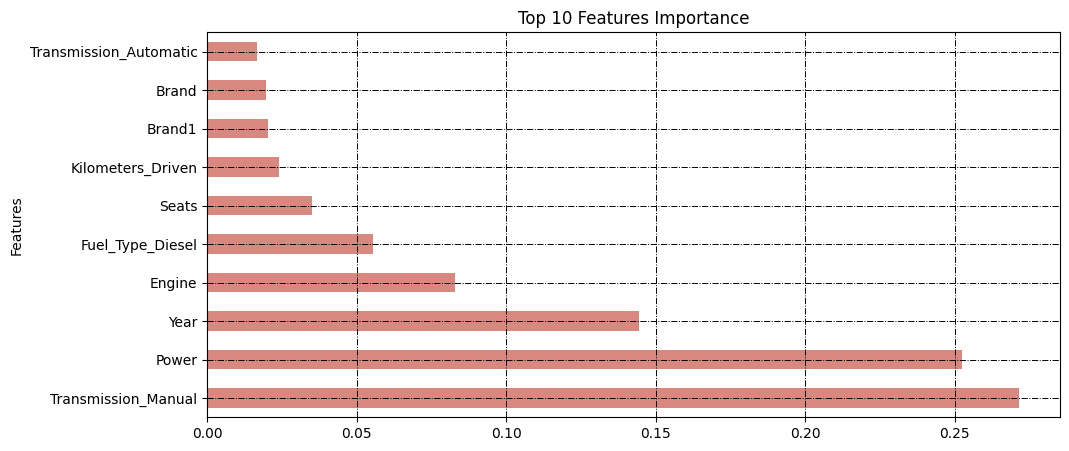

In [148]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Assuming df3_inputs contains your input features and df3_target contains your target variable

# Initialize the model
model = ExtraTreesRegressor()

# Fit the model
model.fit(df3_inputs, df3_target)

# Use inbuilt class feature_importances of ExtraTreeRegressor
feat_importances = pd.Series(model.feature_importances_, index=df3_inputs.columns)

# Plot graph of feature importances for better visualization
plt.figure(figsize=(11, 5))
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 10 Features Importance")
feat_importances.nlargest(10).plot(kind='barh', color='#D98880')  # You can change the color as desired
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()


In [149]:
test_copy

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Age
0,1,0.391741,1,1,1,0.976629,-0.305276,-0.298485,5.0,0,1,7
1,2,-0.600056,1,1,1,-0.614620,0.635678,0.398485,7.0,2,3,3
2,0,0.790723,1,1,1,-0.674291,0.864322,0.701515,7.0,2,5,6
3,3,-0.007240,1,1,0,1.294878,-0.119347,-0.374091,5.0,4,7,4
4,3,1.119295,0,1,1,0.081551,-0.369347,-0.298485,5.0,5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...
597,6,0.602967,0,0,0,-0.787668,0.380653,0.672727,5.0,3,73,12
598,9,0.068590,0,1,0,0.371954,-0.369347,-0.224242,5.0,5,33,8
599,4,1.823380,1,1,0,0.161114,-0.305276,-0.300000,5.0,0,1,10
600,5,-0.300609,1,0,1,-0.694182,0.819095,1.671212,5.0,11,59,4


In [150]:
test_copy.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand1,Model,Age
0,1,0.391741,1,1,1,0.976629,-0.305276,-0.298485,5.0,0,1,7
1,2,-0.600056,1,1,1,-0.614620,0.635678,0.398485,7.0,2,3,3
2,0,0.790723,1,1,1,-0.674291,0.864322,0.701515,7.0,2,5,6
3,3,-0.007240,1,1,0,1.294878,-0.119347,-0.374091,5.0,4,7,4
4,3,1.119295,0,1,1,0.081551,-0.369347,-0.298485,5.0,5,8,11


In [151]:
#Splitting data into independent and dependent data

#TAKE X AS TARINING DATA,
X=train[['Location','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Brand1','Model','Age']]
y=train.Selling_Price

<h2> CROSS VALIDATION </H2>

In [152]:
#splitting the train-test data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=123)

<h1> TRAINING THE DATA USING VARIOUS REGRESSION MODELS </h1>

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error as mse
import numpy as np

# Perform train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Function for Predicting accuracy
def Scr(Algo, X_data, y_data):
    scr = Algo.score(X_data, y_data)
    return scr

# K-fold cross-validation
def k_fold(model, X_data, y_data):
    k_folds = KFold(n_splits=5, shuffle=False)
    scores = cross_val_score(model, X_data, y_data, cv=k_folds, scoring='r2')
    avg_score = np.mean(scores)
    return avg_score

# Function for root mean square
def rmsle(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_ls = linreg.predict(X_test)
print('Linear Regression:')
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_ls), 2))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_ls), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)), 2))
print('R²:', round(linreg.score(X_test, y_test), 4))

# Random Forest Regression
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)
print('\nRandom Forest Regression:')
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_reg), 2))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_reg), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)), 2))
print('R²:', round(regressor.score(X_test, y_test), 4))

# Ridge Regression
rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
print('\nRidge Regression:')
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_rr), 2))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_rr), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)), 2))
print('R²:', round(rr.score(X_test, y_test), 4))

# GBR
gbr = GradientBoostingRegressor(loss='squared_error', max_depth=6)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print('\nGradient Boosting Regression:')
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_gbr), 2))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_gbr), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)), 2))
print('R²:', round(gbr.score(X_test, y_test), 4))

# Lasso
ls = Lasso()
ls.fit(X_train, y_train)
ls_predic = ls.predict(X_test)
print('\nLasso:')
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, ls_predic), 2))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, ls_predic), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, ls_predic)), 2))
print('R²:', round(ls.score(X_test, y_test), 4))

# XGB
model_xgb = xgb.XGBRegressor(colsample_bytree=0.52, gamma=0.03,
                             learning_rate=0.072, max_depth=6,
                             min_child_weight=2, n_estimators=2200,
                             reg_alpha=0, reg_lambda=1,
                             subsample=0.615,
                             random_state=7, nthread=-1)
model_xgb.fit(X_train, y_train)
xg_pre = (model_xgb.predict(X_test))
print('\nXGBoost:')
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, xg_pre), 2))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, xg_pre), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, xg_pre)), 2))
print('R²:', round(model_xgb.score(X_test, y_test), 4))

# KNN
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('\nK-Nearest Neighbors:')
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred), 2))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
accuracy = knn.score(X_test, y_test)
print('R²:', round(accuracy, 4))


Linear Regression:
Mean Squared Error: 35.86
Mean Absolute Error: 3.63
Root Mean Squared Error: 5.99
R²: 0.6921

Random Forest Regression:
Mean Squared Error: 10.94
Mean Absolute Error: 1.43
Root Mean Squared Error: 3.31
R²: 0.9061

Ridge Regression:
Mean Squared Error: 35.87
Mean Absolute Error: 3.63
Root Mean Squared Error: 5.99
R²: 0.6921

Gradient Boosting Regression:
Mean Squared Error: 10.2
Mean Absolute Error: 1.35
Root Mean Squared Error: 3.19
R²: 0.9124

Lasso:
Mean Squared Error: 38.49
Mean Absolute Error: 3.62
Root Mean Squared Error: 6.2
R²: 0.6696

XGBoost:
Mean Squared Error: 7.56
Mean Absolute Error: 1.21
Root Mean Squared Error: 2.75
R²: 0.9351

K-Nearest Neighbors:
Mean Squared Error: 13.27
Mean Absolute Error: 1.57
Root Mean Squared Error: 3.64
R²: 0.886


In [154]:
test_copy.dtypes

Location               int64
Kilometers_Driven    float64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand1                 int64
Model                  int64
Age                    int64
dtype: object

In [155]:
X.dtypes

Location               int64
Kilometers_Driven    float64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand1                 int64
Model                  int64
Age                    int64
dtype: object

<h1>FINAL PREDICTION<h1> <h2>USIING XGB MODLE</h2>

In [156]:
prediction =model_xgb.predict(test_copy)
sol = pd.DataFrame({'Selling_Price': prediction })
sol = round(sol['Selling_Price'],2)

In [157]:
output = pd.read_excel('test1.xlsx')

FileNotFoundError: ignored

In [ ]:
output['Predicted Selling_price in lacs']=prediction
output['Predicted Selling_price in lacs']=output['Predicted Selling_price in lacs'].round(2)

In [ ]:
writer = pd.ExcelWriter('Test_Final.xlsx', engine='xlsxwriter')
output.to_excel(writer, sheet_name='Sheet1', index=False)
#writer.save()

In [ ]:
output.head(50)